In [2]:
# %reset -f
%config Completer.use_jedi = True
# %matplotlib widget
from scipy.stats import rankdata
from sklearn.preprocessing import normalize
import graphistry
graphistry.register(api=3, username='dcolinmorgan', password='f5UwthGEF@F@xnP')
import sklearn.utils as sku
import plotly.graph_objects as go
import plotly.express as px
import chart_studio.plotly as py
# import chart_studio
# chart_studio.tools.set_credentials_file(username='dcolinmorgan', api_key='9FS3nO6nWYFq5zT6BRHD')
import plotly
import scipy
import warnings
warnings.filterwarnings('ignore')

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os,glob,sys,importlib,pickle,tqdm
from itertools import combinations#,scipy,coolbox,pybedtools,
# from scipy.stats import linregress
# from scipy.ndimage import gaussian_filter
from tqdm import tqdm
from IPython.display import Image
import pandas as pd
import seaborn as sns
from scipy import stats
import networkx as nx
from pathlib import Path
# import pyvis
# from pyvis.network import Network
import networkit as nk
# from statannot import add_stat_annotation
from statannotations.Annotator import Annotator
# import biosppy
# from sklearn import metrics

os.chdir('/home/dcmorgan')
os.getcwd()

'/home/dcmorgan'

In [4]:
patt='all'
sys.path.insert(1, './run/gcn/')
import gcn_func
importlib.reload(sys.modules['gcn_func'])
from gcn_func import bip, load_list_of_dicts, meas, time_bar,proc_dat,rev_tbar,group_time_plot,time_order_net,build_gcn,structural_analysis

sys.path.insert(1, './nestedness_analysis/')
import nestedness_metrics_other_functions
from nestedness_metrics_other_functions import from_edges_to_matrix
# importlib.reload(sys.modules['EO_functions_bipartite'])
import extremal_bi

# bioinfo > net

In [ ]:
R0396MWT=pd.read_csv('hmp_subset_genefamilies-cpm.tsv',sep='\t',usecols=[0,1])
R0396MWT=R0396MWT[R0396MWT['R0003-CPK-DNA_Abundance-RPKs']!=0]

In [ ]:
# R0396MWT['gene']=R0396MWT['# Gene Family'].str.split('|').str[0].str.split('_').str[1].tolist()
# R0396MWT['spec']=R0396MWT['# Gene Family'].str.split('|').str[1].tolist()

# R0396MWT=R0396MWT[['spec','gene']]
# R0396MWT.spec=R0396MWT.spec.astype('str')


R0396MWTa=R0396MWT.loc[np.random.choice(R0396MWT.index, 5000, replace=False)]

In [ ]:
[len(np.unique(R0396MWTa['spec'])),
len(np.unique(R0396MWTa['gene'].astype('str')))]

In [ ]:
G=nx.from_pandas_edgelist(R0396MWTa, 'gene', 'spec', edge_attr=None, create_using=None)
# G = nx.Graph(source=['gene'],target=R0396MWT['spec'])

In [ ]:
from networkx.algorithms import bipartite
# G = nx.path_graph(4)
print(bipartite.is_bipartite(G))
# is_bipartite(G)

In [ ]:
g = nk.generators.HyperbolicGenerator(1e5).generate()
communities = nk.community.detectCommunities(g, inspect=True)

In [ ]:
%%bash
pat=R0396-MWT
awk '($3>90)' run/gcn/pat/"$pat"_proteins_o2 > "$pat"_nko
cut -f2 "$pat"_nko |cut -d "|" -f 1|cut -d "_" -f 2 > "$pat"_tmpA
cut -f2 "$pat"_nko |cut -d "|" -f 2 > "$pat"_tmpB
cut -f3 "$pat"_nko >"$pat"_tmpC
pr -mt -s, "$pat"_tmpB "$pat"_tmpA "$pat"_tmpC >"$pat"_nk
# awk '($3>90)' "$pat"_tmpD >"$pat"_nk
rm *tmp*

In [ ]:
reader = nk.graphio.EdgeListReader(',',1,'#',directed=False,continuous=False)
G = reader.read('R0396-MWT_nk')
map = reader.getNodeMap()


In [ ]:
dd = sorted(nk.centrality.DegreeCentrality(G).run().scores(), reverse=True)
plt.xscale("log")
plt.xlabel("degree")
plt.yscale("log")
plt.ylabel("number of nodes")
plt.plot(dd)
plt.show()

In [ ]:
nk.profiling.Profile.create(G).output('pdf','tmp')

In [ ]:
plmCommunities = nk.community.detectCommunities(G, algo=nk.community.PLM(G, True))

In [ ]:
print("{0} elements assigned to {1} subsets".format(plmCommunities.numberOfElements(),
plmCommunities.numberOfSubsets()))
nk.community.writeCommunities(plmCommunities, "tmp/communtiesPLM.partition")

In [ ]:
sizes = communities.subsetSizes()
sizes.sort(reverse=True)
ax1 = plt.subplot(2,1,1)
ax1.set_ylabel("size")
ax1.plot(sizes)

ax2 = plt.subplot(2,1,2)
ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.set_ylabel("size")
ax2.plot(sizes)
plt.show()

In [ ]:
coreDec = nk.centrality.CoreDecomposition(g)
coreDec.run()
nk.viztasks.drawGraph(g, node_size=[(k**2)*20 for k in coreDec.scores()])
plt.show()

# pheno

In [4]:
primary=pd.read_excel('data/Data Raw - Gut Microbiome Cohort Project Database - 300 Cohort v3.0_280921.xlsx',index_col=0,sheet_name='Primary Data')
diet=pd.read_excel('data/Data Raw - Gut Microbiome Cohort Project Database - 300 Cohort v3.0_280921.xlsx',index_col=0,sheet_name='Diet Data')
blood_stool=pd.read_excel('data/Data Raw - Gut Microbiome Cohort Project Database - 300 Cohort v3.0_280921.xlsx',index_col=0,sheet_name='blood and stool biomarkers')
secondary=pd.read_excel('data/Data Raw - Gut Microbiome Cohort Project Database - 300 Cohort v3.0_280921.xlsx',index_col=0,sheet_name='Secondary Data')
MRI=pd.read_excel('data/Data Raw - Gut Microbiome Cohort Project Database - 300 Cohort v3.0_280921.xlsx',index_col=0,sheet_name='MRI scores')

In [5]:
uni_bact=primary[['Age','Hypertension Category by 24h BP w/o considering antihypertensive med']]
uni_bact=uni_bact.rename(columns={"Hypertension Category by 24h BP w/o considering antihypertensive med": "HT"})
# uni_bact.to_csv('data/gcn/uni_bact.txt',sep='\t')

# build networks

In [1]:
# %%bash ARG
# humann_join_tables -i /groups/cgsd/gordonq/LeungWK_Metagenomics_SS-190611-01a/humann3 -o arg_subset_genefamilies.tsv --file_name genefamilies
# humann_renorm_table -i arg_subset_genefamilies.tsv -o arg_subset_genefamilies-cpm.tsv --units cpm

In [ ]:
# build_gcn('arg_subset_genefamilies-cpm.tsv','ARG')

In [ ]:
# %%bash ##CRC
# humann_join_tables -i /groups/cgsd/gordonq/CPOS_Data*/LeungSY_Metagenomics_CPOS-*/humann3 -o crc_subset_genefamilies.tsv --file_name genefamilies
# humann_renorm_table -i crc_subset_genefamilies.tsv -o crc_subset_genefamilies-cpm.tsv --units cpm

In [5]:
# relab=pd.read_csv('../../groups/cgsd/gordonq/all_hypertension/342_K2_contigsum.csv')
# relab[['p', 'c','o','f','g','s']]=pd.DataFrame(relab["Unnamed: 0"].str.split(';', expand=True).values,
#              columns=['p', 'c','o','f','g','s'])
# del relab["Unnamed: 0"]
# relgene=pd.read_csv('/groups/cgsd/gordonq/LauG_Metagenomics_CPOS-200710-CJX-3455a/50_genefamilies.tsv',sep='\t')
# relgene=pd.read_csv('50_genefamilies-cpm.tsv')
relgene=pd.read_csv('all_arg_subset_genefamilies-cpm.tsv',sep='\t')
# relgene=pd.read_csv('hmp_subset_genefamilies-cpm.tsv',sep='\t',nrows=100)
# relgene=pd.read_csv('',sep='\t')
relgene['gene']=relgene['# Gene Family'].str.split('|').str[0]
relgene=relgene[relgene['gene']!='UniRef90_unknown']
relgene=relgene[relgene['gene']!='UNMAPPED']
relgene.index=relgene['# Gene Family']
del relgene['gene'], relgene['# Gene Family']
# relgene=relgene/relgene.sum(axis=0)

# relgene=relgene/relgene.sum(axis=0)
relgene['gen']=relgene.index.str.split('|').str[1].str.split('.').str[0].tolist()
relgene['spec']=relgene.index.str.split('.').str[1]#.str.split('.').str[0].tolist()
relgene['spec'].replace('_',' ')
relgene.index=relgene.index.str.split('|').str[0]
relgene=relgene.dropna()
# del relgene['# Gene Family']



KeyboardInterrupt



In [42]:
cc=relgene.groupby(['# Gene Family','spec']).sum()
# dd=relgene.groupby(['# Gene Family','gen']).sum()
cc=cc.reset_index()
# dd=dd.reset_index()
cc=cc.rename(columns={'# Gene Family':'gene'})#,'spec':0,'gene':1})

# dd=cc[['gene','spec',net]]
# dd=dd[dd[net]!=0]

check instrucitons [from here](https://stackoverflow.com/questions/23975773/how-to-compare-directed-graphs-in-networkx#54677502)
and [here](https://stackoverflow.com/questions/18261587/python-networkx-remove-nodes-and-edges-with-some-condition)

In [46]:
from networkx.algorithms import bipartite
ff=[]
C=[]
for i,net in enumerate(relgene.columns[:-2]):
    # pd.read_csv()
    dd=cc[['spec','gene',net]]
    dd=dd[dd[net]!=0]
    ee=nx.from_pandas_edgelist(dd,source='spec',target='gene',edge_attr=net)
    remove = [node for node,degree in dict(ee.degree()).items() if degree <5]
    ee.remove_nodes_from(remove)
    ff.append(ee)
    
    B = nx.Graph()
    B.add_nodes_from(dd['spec'], bipartite=0)
    B.add_nodes_from(dd['gene'], bipartite=1)
    B.add_edges_from(tuple(dd[['spec','gene']].itertuples(index=False, name=None)))
    remove = [node for node,degree in dict(B.degree()).items() if degree <5]
    B.remove_nodes_from(remove)
    C.append(B)

with open('data/gcn/NX_Emore_ARG.pkl', 'wb') as f:
    pickle.dump(ff, f)
with open('data/gcn/BX_Emore_ARG.pkl', 'wb') as f:
    pickle.dump(C, f)

In [49]:
graphs = load_list_of_dicts('data/gcn/BX_Emore_ARG.pkl')
len(graphs[12].edges())
# B=graphs[3]
# remove = [node for node,degree in dict(B.degree()).items() if degree <2]
# B.remove_nodes_from(remove)
# len(B.edges)

0

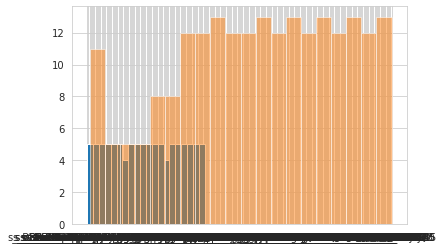

In [98]:
measur=eval('nx.degree_centrality')
tmp=plt.hist(measur(graphs[1]),bins=20)
tmp=plt.hist(measur(graphs[0]),bins=20,alpha=.5)

In [ ]:
HT50=uni_bact[uni_bact.index.isin(relgene.columns[:-2].str.split('-').str[0])]
HT50['index']=np.arange(len(HT50))
S = [nx.clustering(graphs[i]) for i in HT50[HT50['HT']==0]['index'].values]
T = [nx.clustering(graphs[i]) for i in HT50[HT50['HT']!=0]['index'].values]

In [ ]:
non=pd.DataFrame(S).melt()
non['type']='NoHT'
non.dropna(inplace=True)
non=non[non.value!=0]
non=non[~non['variable'].str.contains('UniRef90')]
non.value=non.value/np.sum(non.value)
yes=pd.DataFrame(T).melt()
yes['type']='HT'
yes.dropna(inplace=True)
yes=yes[yes.value!=0]
yes=yes[~yes['variable'].str.contains('UniRef90')]
yes.value=yes.value/np.sum(yes.value)
df=non.append(yes)
# df=df.dropna()
df['gen']=df.variable.str.split('_').str[2]

In [ ]:
[sum(non.value),sum(yes.value)]

In [ ]:
tmp=plt.hist(non.value,log=True,bins=100)
tmp=plt.hist(yes.value,log=True,bins=100,alpha=.5)

In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
# rs = np.random.RandomState(1979)
# x = rs.randn(500)
# g = np.tile(list("ABCDEFGHIJ"), 50)
# df = pd.DataFrame(dict(x=x, g=g))
# m = df.g.map(ord)
# df["x"] += m

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df[df['type']=='HT'], row="gen", hue="gen", aspect=20, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "value",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "value", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "value")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
plt.savefig("data/gcn/degree_centrality_HT.png",dpi=300,bbox_inches = "tight")


In [ ]:
relgene=pd.read_csv('hmp_subset_genefamilies-cpm.tsv',sep='\t')

relgene['gene']=relgene['# Gene Family'].str.split('|').str[0]
relgene=relgene[relgene['gene']!='UniRef90_unknown']
relgene=relgene[relgene['gene']!='UNMAPPED']
relgene.index=relgene['# Gene Family']
del relgene['gene'], relgene['# Gene Family']
# relgene=relgene/relgene.sum(axis=0)
relgene=relgene/relgene.sum(axis=0)
relgene['gen']=relgene.index.str.split('|').str[1].str.split('.').str[0].tolist()
relgene['spec']=relgene.index.str.split('.').str[1]#.str.split('.').str[0].tolist()
relgene['spec'].replace('_',' ')
relgene.index=relgene.index.str.split('|').str[0]
relgene=relgene.dropna()


cc=relgene.groupby(['# Gene Family','spec']).sum()
# dd=relgene.groupby(['# Gene Family','gen']).sum()
cc=cc.reset_index()
# dd=dd.reset_index()
cc=cc.rename(columns={'# Gene Family':'gene'})#,'spec':0,'gene':1})


primary=pd.read_excel('data/Data Raw - Gut Microbiome Cohort Project Database - 300 Cohort v3.0_280921.xlsx',index_col=0,sheet_name='Primary Data')
uni_bact=primary[['Age','Hypertension Category by 24h BP w/o considering antihypertensive med']]
uni_bact=uni_bact.rename(columns={"Hypertension Category by 24h BP w/o considering antihypertensive med": "HT"})


# analyze HT nets

In [6]:
patt='all'
sys.path.insert(1, './run/gcn/')
import gcn_func
importlib.reload(sys.modules['gcn_func'])
from gcn_func import bip, load_list_of_dicts, meas, time_bar,proc_dat,rev_tbar,group_time_plot,time_order_net,build_gcn#plotRidge,LayeredNetworkGraph,plot_sankey

# relgene=pd.read_csv('data/gcn/relgene_all.txt',sep='\t')
# graphs = load_list_of_dicts('data/gcn/BX_'+patt+'_HT.pkl')
# HTXX=uni_bact[uni_bact.index.isin(relgene.columns[1:-2].str.split('-').str[0])]
# HTXX['index']=np.arange(len(HTXX))


In [7]:
# for i,net in tqdm.tqdm(enumerate(BX_graphs)):
for i,net in tqdm(enumerate(HTXX[HTXX['HT']!=5]['index'].values)):
  cc=nx.convert_matrix.to_pandas_edgelist(graphs[i])
  # cc['weight']=np.random.randn(len(cc))
  rrr=str(HTXX[HTXX['index']==i]['Age'].item())+'_'+str(HTXX[HTXX['index']==i]['HT'].item())#+'_'+str(HTXX[HTXX['index']==i]['sex'].item())
  cc.rename(columns={cc.columns[2]:rrr},inplace=True)
  if i==0:
    dd=cc
  else:
    dd=dd.merge(cc,on=['source','target'],how='outer')
# dd.dropna(how='any')

286it [02:16,  2.09it/s]


In [8]:
dd.set_index(['source', 'target'], inplace=True) #>> run only first time editing dd
# dd = dd/np.max(dd,axis=0)
# dd=dd/np.sum(dd,axis=0) ###tried to do things strangely
### dd=np.argsort(dd)
noHT=dd.filter(regex='_0_').dropna(how='all')
HT1=dd.filter(regex='_1_')#.dropna(how='all')
HT2=dd.filter(regex='_2_')#.dropna(how='all')
HT=HT1.merge(HT2,right_index=True,left_index=True).dropna(how='all')
# [noHT.shape,HT1.shape,HT2.shape]
[noHT.shape,HT.shape]

[(138518, 98), (137485, 148)]

## case v control nets

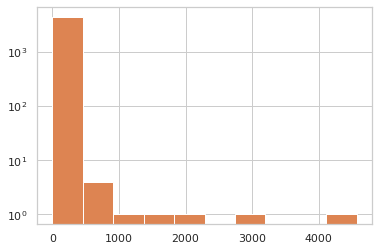

In [109]:
ccc=pd.DataFrame(noHT.sum(axis=1)).reset_index()
g=nx.from_pandas_edgelist(ccc,source='source',target='target',edge_attr=0)
C = nx.Graph()
C.add_nodes_from(ccc['source'], bipartite=0)
C.add_nodes_from(ccc['target'], bipartite=1)
C.add_weighted_edges_from(tuple(ccc[['source','target',0]].itertuples(index=False, name=None)))

ddd=pd.DataFrame(HT.sum(axis=1)).reset_index()
g=nx.from_pandas_edgelist(ddd,source='source',target='target',edge_attr=0)
B = nx.Graph()
B.add_nodes_from(ccc['source'], bipartite=0)
B.add_nodes_from(ccc['target'], bipartite=1)
B.add_weighted_edges_from(tuple(ccc[['source','target',0]].itertuples(index=False, name=None)))

pd.DataFrame(nx.degree_histogram(B))
pd.DataFrame(nx.degree_histogram(C))

tmp=plt.hist(nx.degree_histogram(C),log=True,bins=10)

tmp=plt.hist(nx.degree_histogram(B),log=True,bins=10)

In [17]:
ccc=pd.DataFrame(noHT.sum(axis=1)).reset_index()
# ccc=ccc[ccc[0]>10**-2].dropna()#percentage cutoff
ccc=ccc[ccc[0]>10].dropna()
# g=nx.from_pandas_edgelist(ccc,source='source',target='target',edge_attr=0)
C = nx.Graph()
C.add_nodes_from(ccc['source'], bipartite=0)
C.add_nodes_from(ccc['target'], bipartite=1)
C.add_weighted_edges_from(tuple(ccc[['source','target',0]].itertuples(index=False, name=None)))

ddd=pd.DataFrame(HT.sum(axis=1)).reset_index()
# ddd=ddd[ddd[0]>10**-2].dropna()
ddd=ddd[ddd[0]>10].dropna()
# g=nx.from_pandas_edgelist(ddd,source='source',target='target',edge_attr=0)
B = nx.Graph()
B.add_nodes_from(ddd['source'], bipartite=0)
B.add_nodes_from(ddd['target'], bipartite=1)
B.add_weighted_edges_from(tuple(ddd[['source','target',0]].itertuples(index=False, name=None)))


In [18]:
g = graphistry.edges(ddd, 'source', 'target','value')
g.plot()

In [19]:
g = graphistry.edges(ccc, 'source', 'target','value')
g.plot()

## bin & time steps

[(138518, 98), (137485, 148)]

<AxesSubplot:xlabel='t', ylabel='value'>

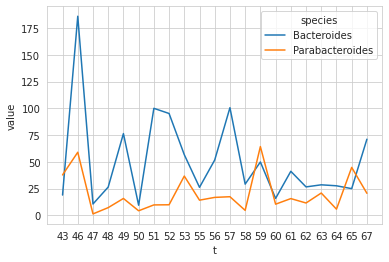

In [9]:
noHT=dd.filter(regex='_0_').dropna(how='all')
HT1=dd.filter(regex='_1_')#.dropna(how='all')
HT2=dd.filter(regex='_2_')#.dropna(how='all')
HT=HT1.merge(HT2,right_index=True,left_index=True).dropna(how='all')
[noHT.shape,HT.shape]

noHT.columns=noHT.columns.str.split('_').str[0]
noHT=noHT.groupby(by=noHT.columns, axis=1).mean()
noHT=noHT.dropna(how='any')
noHT.reset_index(inplace=True)
jj=noHT.melt(['source','target'])
jj.rename(columns={'variable':'time'},inplace=True)
jj['t']=jj['time']
jj['species']=jj['source'].str.split('_').str[2]
jj=jj.dropna(how='any')
sns.lineplot(data=jj[jj['target']=='UniRef90_T4BVE4'], x="t", y="value", hue="species")


<AxesSubplot:xlabel='t', ylabel='value'>

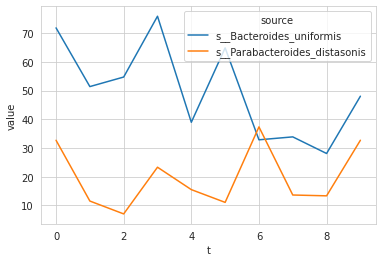

In [134]:
noHT=dd.filter(regex='_0_').dropna(how='all')
HT1=dd.filter(regex='_1_')#.dropna(how='all')
HT2=dd.filter(regex='_2_')#.dropna(how='all')
HT=HT1.merge(HT2,right_index=True,left_index=True).dropna(how='all')
[noHT.shape,HT.shape]

noHT.columns=noHT.columns.str.split('_').str[0]
noHT=noHT.groupby(by=noHT.columns, axis=1).mean()
noHT=noHT.dropna(how='any')
noHT.columns=pd.qcut((noHT.columns).astype('int'), 10, labels=False)
noHT=noHT.groupby(by=noHT.columns, axis=1).mean()
noHT.reset_index(inplace=True)
jj=noHT.melt(['source','target'])
jj.rename(columns={'variable':'time'},inplace=True)
jj['t']=jj['time']
jj['species']=jj['source'].str.split('_').str[2]
jj=jj.dropna(how='any')
sns.lineplot(data=jj[jj['target']=='UniRef90_T4BVE4'], x="t", y="value", hue="source")


<AxesSubplot:xlabel='t', ylabel='value'>

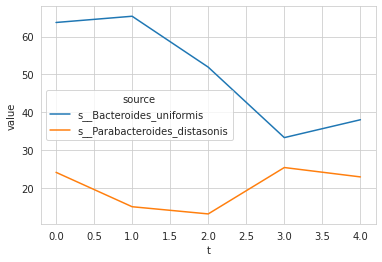

In [135]:
noHT=dd.filter(regex='_0_').dropna(how='all')
HT1=dd.filter(regex='_1_')#.dropna(how='all')
HT2=dd.filter(regex='_2_')#.dropna(how='all')
HT=HT1.merge(HT2,right_index=True,left_index=True).dropna(how='all')
[noHT.shape,HT.shape]

noHT.columns=noHT.columns.str.split('_').str[0]
noHT=noHT.groupby(by=noHT.columns, axis=1).mean()
noHT=noHT.dropna(how='any')
noHT.columns=pd.qcut((noHT.columns).astype('int'), 5, labels=False)
noHT=noHT.groupby(by=noHT.columns, axis=1).mean()
noHT.reset_index(inplace=True)
jj=noHT.melt(['source','target'])
jj.rename(columns={'variable':'time'},inplace=True)
jj['t']=jj['time']
jj['species']=jj['source'].str.split('_').str[2]
jj=jj.dropna(how='any')
sns.lineplot(data=jj[jj['target']=='UniRef90_T4BVE4'], x="t", y="value", hue="source")


In [58]:
noHT=dd.filter(regex='_0_').dropna(how='all')
HT1=dd.filter(regex='_1_')#.dropna(how='all')
HT2=dd.filter(regex='_2_')#.dropna(how='all')
HT=HT1.merge(HT2,right_index=True,left_index=True).dropna(how='all')

TU,TD,noHTT,HTT=time_order_net(noHT,HT,10**-6,'target',5,1,'mean')
TU.reset_index(inplace=True)
TD.reset_index(inplace=True)
[TU.shape,TD.shape]

[(93, 6), (61, 6)]

In [59]:
noHT=dd.filter(regex='_0_').dropna(how='all')
HT1=dd.filter(regex='_1_')#.dropna(how='all')
HT2=dd.filter(regex='_2_')#.dropna(how='all')
HT=HT1.merge(HT2,right_index=True,left_index=True).dropna(how='all')

LU,LD,noHDL,HTL=time_order_net(noHT,HT,10**-6,['source','target'],5,1,'median')
LU.reset_index(inplace=True)
LD.reset_index(inplace=True)
[LU.shape,LD.shape]

[(821, 7), (632, 7)]

In [292]:
# try to see which species are causing flux in protein content
# np.unique(noHTT[noHTT['target'].isin(LU[~LU['target'].isin(TU.index)]['target'])]['source'])

In [62]:
LinkUP=LU[LU['target'].isin(LD['target'])]#['source']

In [63]:
LinkDN=LD[LD['target'].isin(LU['target'])]#['source']

In [79]:
JEFF=LinkUP.append(LinkDN)#
JEFF[5]=JEFF[4]-JEFF[0]

In [83]:
JEFF

,source,target,0,1,2,3,4,5
0,s__Bacteroides_clarus,UniRef90_T4BVE4,-58.6,-31.8,14.9,67.2,261.1,319.7
6,s__Clostridium_innocuum,UniRef90_C6LDA3,-12.2,-0.2,6.0,6.5,9.6,21.8
29,s__Clostridium_leptum,UniRef90_C7H736,-2.4,-1.8,-0.8,0.7,7.5,9.9
86,s__Bacteroides_intestinalis,UniRef90_A0A318N1V3,-3.7,-0.4,0.2,0.6,2.0,5.7
121,s__Blautia_obeum,UniRef90_A0A136Q5X8,-1.1,-0.3,-0.1,1.1,3.6,4.7
...,...,...,...,...,...,...,...,...
562,s__Alistipes_finegoldii,UniRef90_A0A318N1V3,0.9,0.6,0.5,-1.0,-2.5,-3.4
583,s__Ruminococcus_lactaris,UniRef90_A0A3E2TPS1,4.0,0.4,-0.0,-0.1,-0.2,-4.2
591,s__Coprococcus_eutactus,UniRef90_A0A174GXS8,2.0,1.7,0.2,-0.4,-2.8,-4.8
609,s__Agathobaculum_butyriciproducens,UniRef90_A0A3E4EC37,3.3,1.9,-0.9,-2.1,-4.2,-7.5


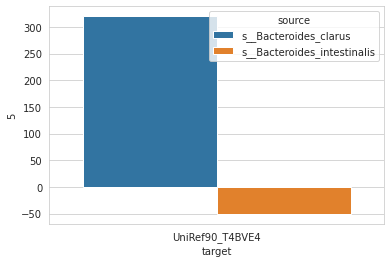

In [136]:
ax = sns.barplot(x="target", y=5, hue="source", data=JEFF[JEFF['target']=='UniRef90_T4BVE4'])

In [51]:
TU[(TU['target']=='UniRef90_T4BVE4')&(TU['target']=='UniRef90_D4IN85')&(TU['target']=='UniRef90_Q97TA2')&(TU['target']=='UniRef90_P0C0G7')]
TD[(TD['target']=='UniRef90_T4BVE4')&(TD['target']=='UniRef90_D4IN85')&(TD['target']=='UniRef90_Q97TA2')&(TD['target']=='UniRef90_P0C0G7')]

,target,0,1,2,3,4


## networkx stuff

In [37]:
g=nx.from_pandas_edgelist(noHT[noHT[0]>10**-6].dropna(),source='source',target='target',edge_attr=0)
h=nx.from_pandas_edgelist(noHT[noHT[1]>10**-6].dropna(),source='source',target='target',edge_attr=1)
i=nx.from_pandas_edgelist(noHT[noHT[2]>10**-6].dropna(),source='source',target='target',edge_attr=2)
j=nx.from_pandas_edgelist(noHT[noHT[3]>10**-6].dropna(),source='source',target='target',edge_attr=3)
k=nx.from_pandas_edgelist(noHT[noHT[4]>10**-6].dropna(),source='source',target='target',edge_attr=4)
l=nx.from_pandas_edgelist(noHT[noHT[5]>10**-6].dropna(),source='source',target='target',edge_attr=5)
m=nx.from_pandas_edgelist(noHT[noHT[6]>10**-6].dropna(),source='source',target='target',edge_attr=6)

gg=nx.from_pandas_edgelist(HT[HT[0]>10**-6].dropna(),source='source',target='target',edge_attr=0)
hh=nx.from_pandas_edgelist(HT[HT[1]>10**-6].dropna(),source='source',target='target',edge_attr=1)
ii=nx.from_pandas_edgelist(HT[HT[2]>10**-6].dropna(),source='source',target='target',edge_attr=2)
jj=nx.from_pandas_edgelist(HT[HT[3]>10**-6].dropna(),source='source',target='target',edge_attr=3)
kk=nx.from_pandas_edgelist(HT[HT[4]>10**-6].dropna(),source='source',target='target',edge_attr=4)
ll=nx.from_pandas_edgelist(HT[HT[5]>10**-6].dropna(),source='source',target='target',edge_attr=5)
mm=nx.from_pandas_edgelist(HT[HT[6]>10**-6].dropna(),source='source',target='target',edge_attr=6)

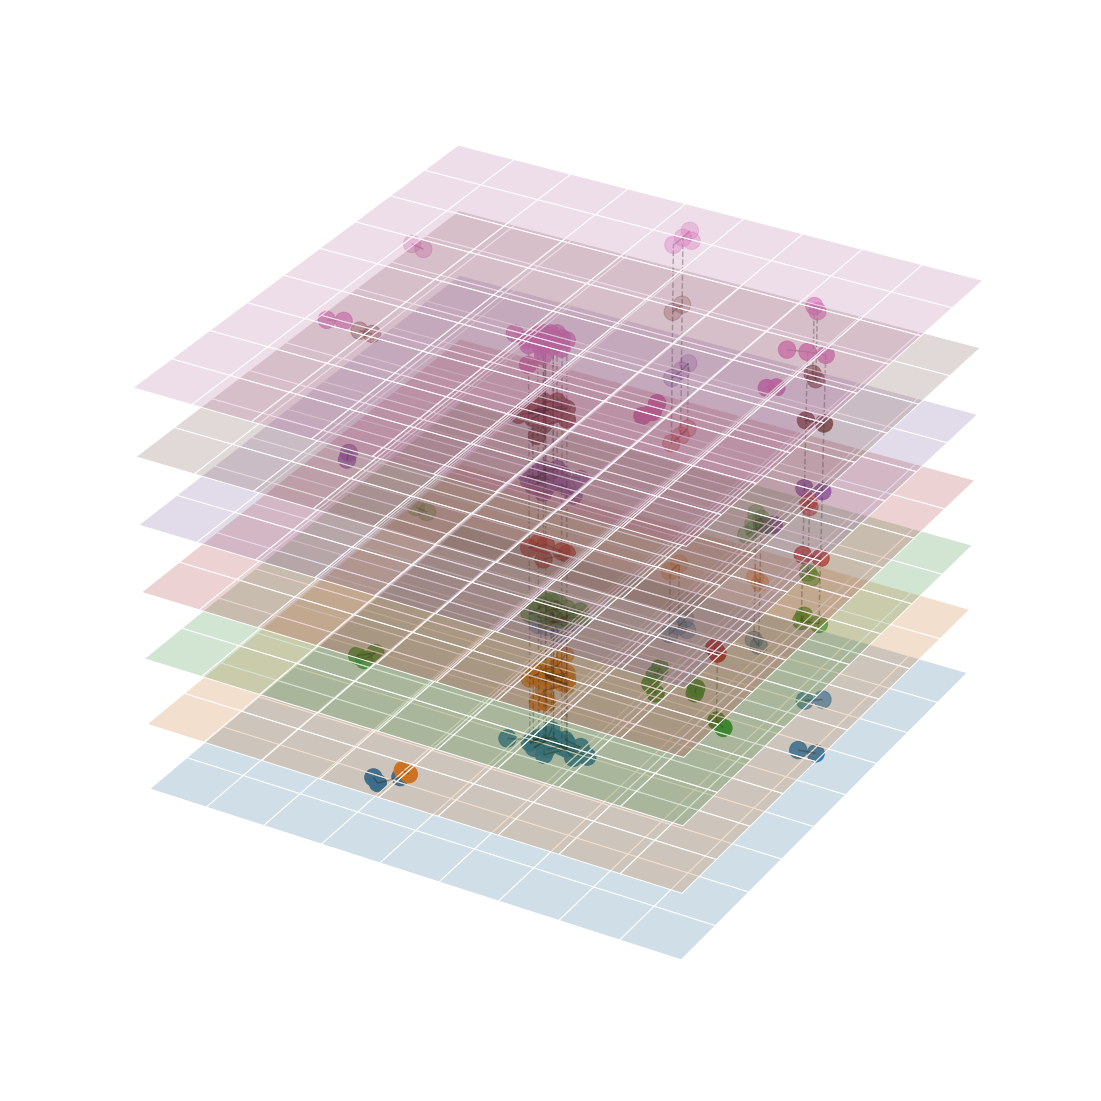

In [131]:
fig=plt.figure(figsize=(5,15))
ax = fig.add_subplot(projection='3d')
LayeredNetworkGraph([g, h, i,j,k,l,m], ax=ax, layout=nx.spring_layout)
ax.set_axis_off()
# ax.figsize(5,15)
# plt.show()
fig.set_size_inches(20, 20)
fig.savefig('noHT.png', dpi=100)

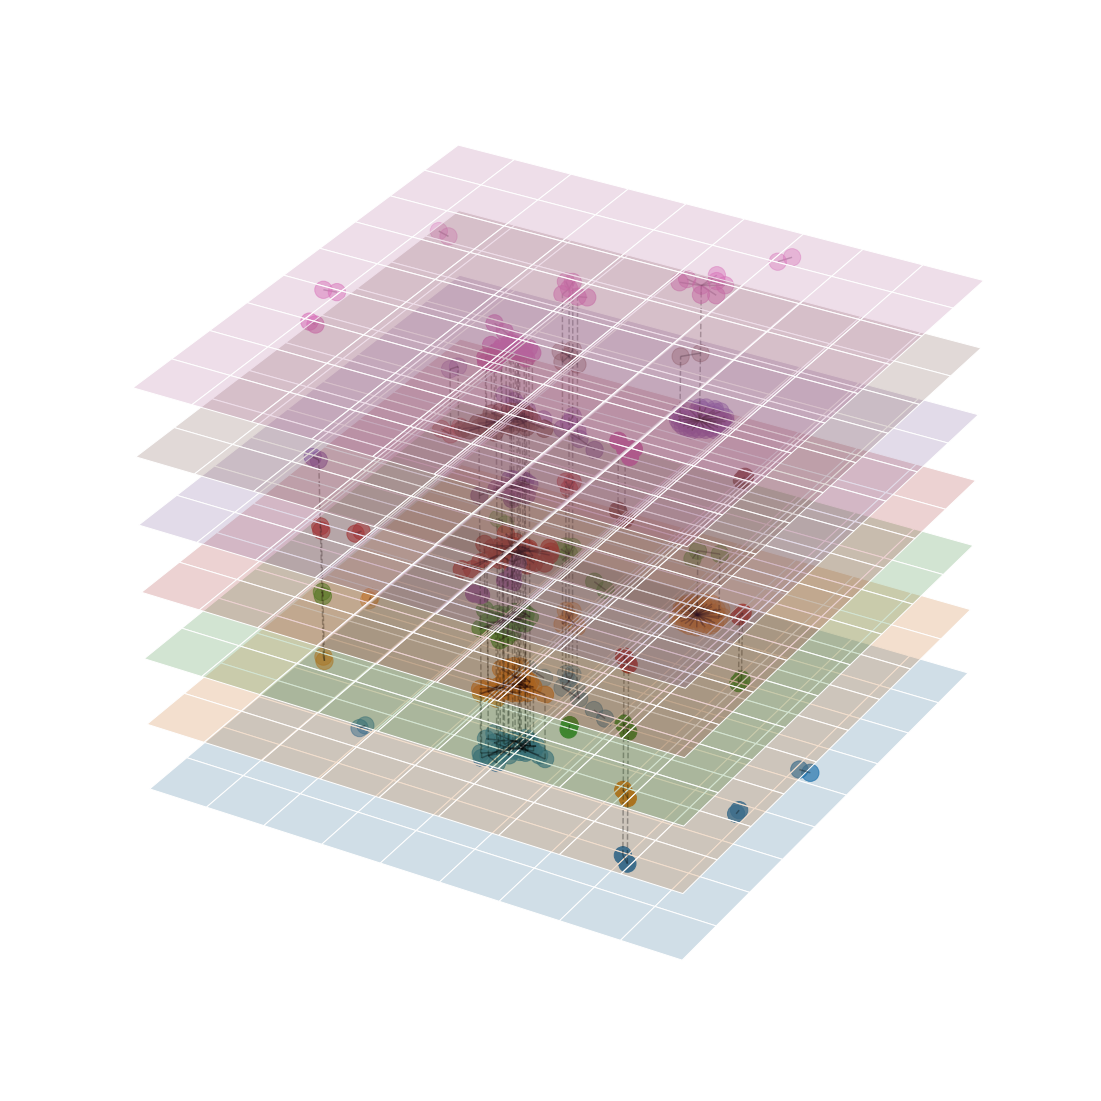

In [133]:
fig=plt.figure(figsize=(5,15))
ax = fig.add_subplot(projection='3d')
LayeredNetworkGraph([g, h, i,j,k,l,m], ax=ax, layout=nx.spring_layout)
ax.set_axis_off()
# ax.figsize(5,15)
# plt.show()
fig.set_size_inches(20, 20)
fig.savefig('HT.png', dpi=100)

## 7 groups histograms

In [147]:
cc

,source,target,0,1,2,3,4,5,6,all
0,s__Bacteroides_fragilis,UniRef90_A0A015P063,0.161968,3.428513,0.024364,0.144229,0.027537,0.206218,0.763379,1.532787
1,s__Bacteroides_fragilis,UniRef90_A0A015QIN6,120.222164,153.669494,NaN,135.257977,94.578504,NaN,6.556933,3318.079568
2,s__Bacteroides_fragilis,UniRef90_A0A015TZH5,10.426517,0.182845,NaN,NaN,NaN,0.141773,1.455621,24.544465
3,s__Bacteroides_fragilis,UniRef90_A0A015U8D5,0.144928,1.698024,0.003901,0.199911,0.001951,3.433236,0.180333,1.697282
4,s__Bacteroides_fragilis,UniRef90_A0A015U8H2,10.334522,30.518451,6.087866,5.906543,0.744355,431.038267,14.941701,25245.799461
...,...,...,...,...,...,...,...,...,...,...
85574,s__Bacteroides_ovatus,UniRef90_R7HM42,NaN,NaN,NaN,NaN,2.906666,NaN,0.130913,3.852402
85578,s__Bacteroides_uniformis,UniRef90_R7HM42,NaN,NaN,NaN,NaN,0.637070,NaN,0.105038,0.141529
85581,s__Prevotella_copri,UniRef90_R7HM42,NaN,NaN,NaN,NaN,1.499697,NaN,86.535300,3615.526898
85585,s__Prevotella_stercorea,UniRef90_R7HM42,NaN,NaN,NaN,NaN,9.818033,NaN,189.554858,16152.663217


<AxesSubplot:xlabel='value', ylabel='Density'>

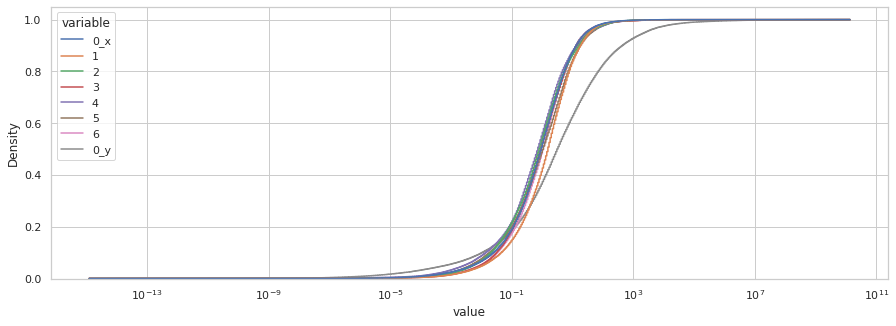

In [151]:
cc=HT.merge(pd.DataFrame(aa),right_index=True,left_index=True)
# cc.rename(columns={'0_x':'0','0_y':'all'},inplace=True)
cc=cc.melt(['source','target'])
plt.figure(figsize=(15,5))
sns.histplot(data=cc, x="value", hue="variable", log_scale=True, element="step", fill=False,
    cumulative=True, stat="density", common_norm=False)
    

<AxesSubplot:xlabel='value', ylabel='Count'>

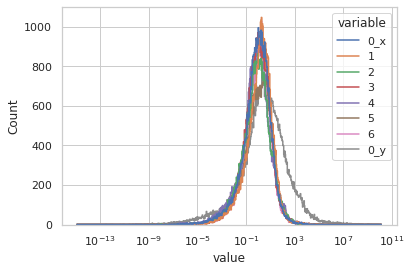

In [149]:
sns.histplot(data=cc, x="value", log_scale=True, element="step", fill=False,hue='variable')


<AxesSubplot:xlabel='value', ylabel='Density'>

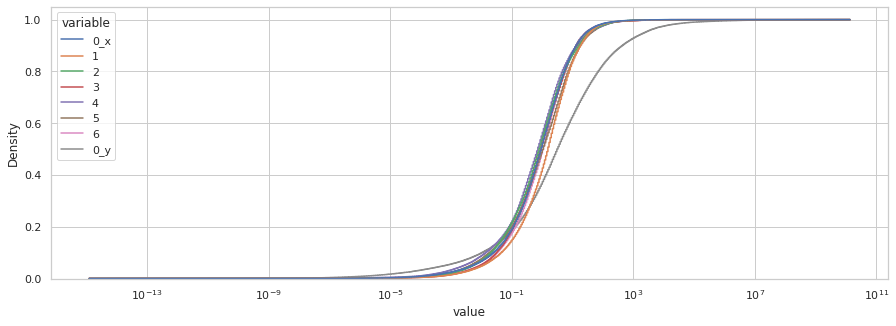

In [156]:
dd=noHT.merge(pd.DataFrame(aa),right_index=True,left_index=True)
# cc.rename(columns={'0_x':'0','0_y':'all'},inplace=True)
dd=dd.melt(['source','target'])
plt.figure(figsize=(15,5))
sns.histplot(
    data=cc, x="value", hue="variable",
    # hue_order=["Radial Velocity", "Transit"],
    log_scale=True, element="step", fill=False,
    cumulative=True, stat="density", common_norm=False,
)

<AxesSubplot:xlabel='value', ylabel='Count'>

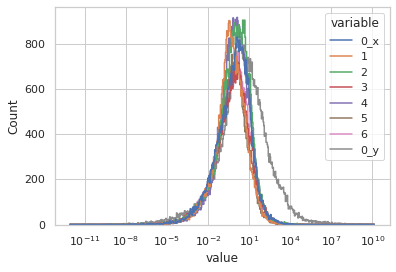

In [157]:
sns.histplot(data=dd, x="value", log_scale=True, element="step", fill=False,hue='variable')


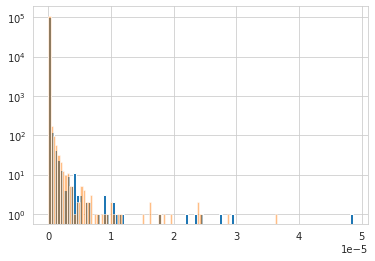

In [ ]:
# tmp=plt.hist(HT.melt().value.dropna(how='all'),bins=100,log=True)
tmp=plt.hist(bb.values,bins=100,log=True)
tmp=plt.hist(aa.values,bins=100,log=True,alpha=.5)


## time plot

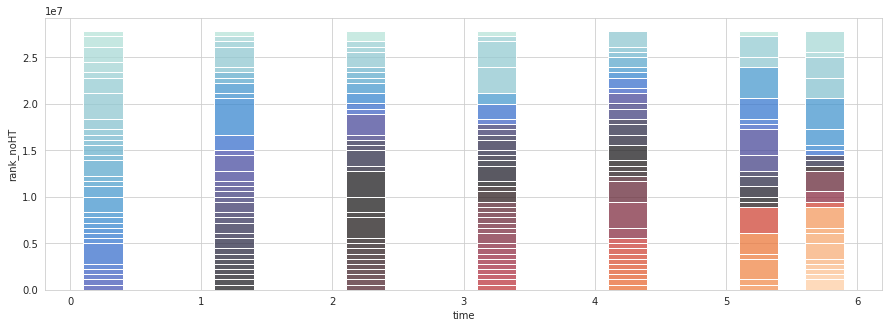

In [37]:
group_time_plot(noHT,7,10,'0')

In [142]:
jj['variable']=jj['variable'].astype('int')+2000
jj['variable'] = pd.to_datetime(jj['variable'], format='%Y')

In [143]:
# dd=(noHT-HT).dropna().melt()
# plt.figure(figsize=(15,5))
# sns.histplot(
#     data=dd, x="value", hue="variable",
#     # hue_order=["Radial Velocity", "Transit"],
#     log_scale=True, element="step", fill=False,
#     cumulative=True, stat="density", common_norm=False,
# )
jj=noHT.reset_index().melt(id_vars=['source','target'])

g = graphistry.edges(jj, 'source', 'target','value','variable')
g.plot()

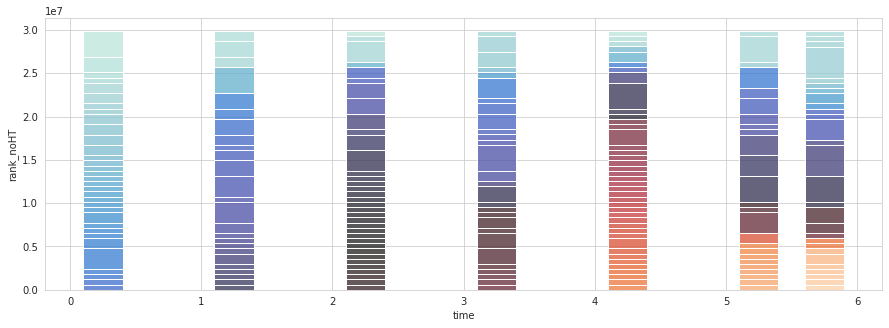

In [39]:
group_time_plot(HT,7,10,'0')

In [ ]:
# jj=jj.dropna(how='any')
# kk=kk.dropna(how='any')
# ll=jj.merge(kk,on=['source','target','time'],how='inner')
ll['vx']=rankdata(ll.value_x,method='min')
ll['vy']=rankdata(ll.value_y,method='min')
ll['diff']=ll['value_x']-ll['value_y']
ll['rank_diff']=ll['vx'].astype('int')-ll['vy'].astype('int')
ll['rank_diff']=np.abs(ll['rank_diff'])
ll.sort_values(by='rank_diff')
ll['species']=ll['source'].str.split('_').str[2]
# ll=ll[np.abs(ll['diff'])>1]
g = graphistry.edges(ll.dropna(how='any'), 'species', 'target','rank_diff')
g.plot()

## full time steps

In [ ]:
# dd = dd/np.max(dd,axis=0)
dd=dd/np.sum(dd,axis=0)
### dd=np.argsort(dd)
noHT=dd.filter(regex='_0_').dropna(how='all')
HT1=dd.filter(regex='_1_')#.dropna(how='all')
HT2=dd.filter(regex='_2_')#.dropna(how='all')
HT=HT1.merge(HT2,right_index=True,left_index=True).dropna(how='all')
# [noHT.shape,HT1.shape,HT2.shape]
[noHT.shape,HT.shape]

jj=noHT.reset_index().melt(id_vars=['source','target'])

noHT.columns=noHT.columns.str.split('_').str[0]
# noHT.columns=pd.qcut((noHT.columns).astype('int'), 7, labels=False)
noHT=noHT.groupby(by=noHT.columns, axis=1).mean()
noHT=noHT.dropna(how='all')

HT.columns=HT.columns.str.split('_').str[0]
# HT.columns=pd.qcut((HT.columns).astype('int'), 7, labels=False)
HT=HT.groupby(by=HT.columns, axis=1).mean()
HT=HT.dropna(how='all')

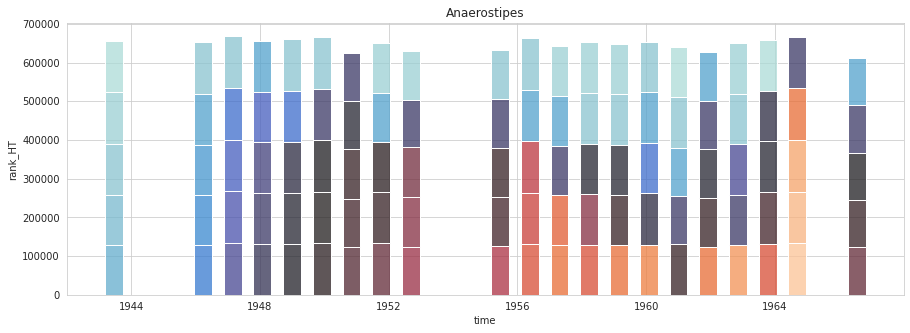

In [21]:
time_bar(jj,5,'rank','Anaerostipes')
# time_bar(jj,5,'value','all')
# time_bar(kk,5,'rank','all')
# time_bar(kk,5,'value','all')
# time_bar(ll,5,'rank_diff','all')
# time_bar(ll,5,'diff','all')

(array([1.34601e+05, 4.30000e+01, 5.00000e+00, 2.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([9.73019437e-08, 1.34037499e-03, 2.68065267e-03, 4.02093036e-03,
        5.36120804e-03, 6.70148573e-03, 8.04176341e-03, 9.38204110e-03,
        1.07223188e-02, 1.20625965e-02, 1.34028742e-02]),
 <BarContainer object of 10 artists>)

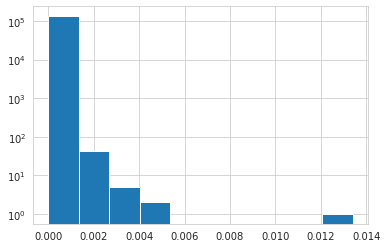

In [22]:
plt.hist(jj.value,log=True)

In [185]:
XX=10
labels,levels=pd.factorize(jj['target'])
jj['prot_id']=labels
jj['t']=jj['time'].astype('str').str.split('-').str[0]
labels,levels=pd.factorize(jj['t'])
jj['t']=labels
data=jj[['species','prot_id','time','t','value']]
df=data.copy()
grouped = data.groupby('prot_id')

def get_next_clus(x): return x['species'].shift(-1)

data["next_clus"] = grouped.apply(
     lambda x: get_next_clus(x)).reset_index(0, drop=True)


# df = data[['species','target','t','value']]#.sort_values(['time'], ascending=[True]).groupby(['species','time']).max(5)
jeff=pd.DataFrame(df.groupby(['species','t'])['value'].nlargest(XX))
jeff.reset_index(inplace=True)

jeffA=data.loc[jeff['level_2']]

/tmp/ipykernel_12189/1710408779.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["next_clus"] = grouped.apply(


In [33]:
grouped = pd.DataFrame(jeffA.groupby(['species', 't'])['prot_id'].apply(list).groupby(level=0).apply(list))
jeff=grouped.explode('prot_id')
jeff.reset_index(inplace=True)

In [184]:
np.unique(data.species)

array(['Agathobaculum', 'Anaerostipes', 'Bacteroides', 'Bifidobacterium',
       'Blautia', 'Dorea', 'Escherichia', 'Eubacterium',
       'Faecalibacterium', 'Flavonifractor', 'Parabacteroides',
       'Roseburia', 'Ruminococcus', 'Ruthenibacterium', 'Streptococcus'],
      dtype=object)

In [34]:
jeff2=jeff[jeff['species']=='Agathobaculum'].explode('prot_id')
# jeff2['prot_id']#.str.split(',')
jeff3=pd.DataFrame(jeff2['prot_id'].to_numpy().reshape(int(len(jeff2)/21),21))
# jeff3.index='Agathobaculum'

(array([ 9.,  1.,  2.,  5.,  1.,  2.,  0.,  1.,  1.,  3., 12.,  1.,  0.,
         9., 19.,  1.,  5.,  4.,  0.,  2., 12.,  1.,  1., 14.,  0.,  3.,
         1.,  8.,  4.,  1.,  1.,  0., 17.,  2.,  1.,  1., 13.,  0.,  6.,
         6.,  1., 10.,  3.,  0.,  1.,  1.,  2., 10.,  8.,  4.]),
 array([ 0.  ,  0.84,  1.68,  2.52,  3.36,  4.2 ,  5.04,  5.88,  6.72,
         7.56,  8.4 ,  9.24, 10.08, 10.92, 11.76, 12.6 , 13.44, 14.28,
        15.12, 15.96, 16.8 , 17.64, 18.48, 19.32, 20.16, 21.  , 21.84,
        22.68, 23.52, 24.36, 25.2 , 26.04, 26.88, 27.72, 28.56, 29.4 ,
        30.24, 31.08, 31.92, 32.76, 33.6 , 34.44, 35.28, 36.12, 36.96,
        37.8 , 38.64, 39.48, 40.32, 41.16, 42.  ]),
 <BarContainer object of 50 artists>)

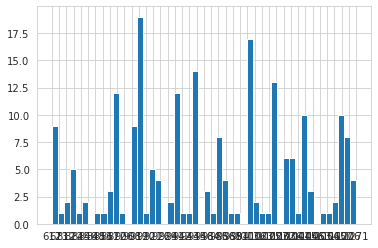

In [35]:
plt.hist((np.sort(jeff3.melt()['value'])).astype('str'),bins=50)#.value_counts())

<BarContainer object of 43 artists>

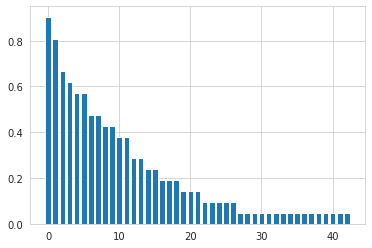

In [36]:
plt.bar(x=np.arange(len((np.unique(jeff3.melt()['value'])))),height=jeff3.melt()['value'].value_counts()/21)


## crazy time plot & stats
run from gcn_plot.py script

In [158]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

cw_lm=ols('value ~ C(variable)', data=cc[cc['variable']!='all']).fit() #Specify C for Categorical
print(sm.stats.anova_lm(cw_lm, typ=2))

                   sum_sq        df         F        PR(>F)
C(variable)  4.943047e-12       6.0  6.521825  6.751730e-07
Residual     5.327156e-08  421717.0       NaN           NaN


In [157]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

cw_lm=ols('value ~ C(variable)', data=dd[dd['variable']!='all']).fit() #Specify C for Categorical
print(sm.stats.anova_lm(cw_lm, typ=2))

                   sum_sq        df         F    PR(>F)
C(variable)  2.064443e-12       6.0  2.028492  0.058265
Residual     6.165503e-08  363488.0       NaN       NaN


## Sankey start
[from nicolasesnis github](https://gist.github.com/nicolasesnis/595d34c3c7dbca2b3419332304954433)

In [215]:
noHT=dd.filter(regex='_0_').dropna(how='all')

noHT.columns=noHT.columns.str.split('_').str[0]
# noHT.columns=pd.qcut((noHT.columns).astype('int'), 7, labels=False)
noHT=noHT.groupby(by=noHT.columns, axis=1).mean()
noHT.reset_index(inplace=True)
jj=noHT.melt(id_vars=['source','target'])
jj=jj.dropna(how='any')

jj.rename(columns={'variable':'t'},inplace=True)
# jj['t']=jj['variable'].astype('str').str.split('-').str[0]
labels,levels=pd.factorize(jj['t'])
jj['t']=labels
jj['species']=jj['source'].str.split('_').str[2]
data=jj[['species','target','t','value']]
df=data.copy()
# grouped = data.groupby('target')
XX=10
def get_next_clus(x): return x['species'].shift(-1)

data["next_clus"] = grouped.apply(
     lambda x: get_next_clus(x)).reset_index(0, drop=True)

# df = data[['species','target','t','value']]#.sort_values(['time'], ascending=[True]).groupby(['species','time']).max(5)

jeff=pd.DataFrame(df.groupby(['species','t'])['value'].nlargest(XX))
jeff.reset_index(inplace=True)

jeffA=data.loc[jeff['level_2']]

grouped = jeffA.groupby('target')

def get_next_clus(x): return x['species'].shift(-1)

jeffA["next_clus"] = grouped.apply(
     lambda x: get_next_clus(x)).reset_index(0, drop=True)

df = jeffA[['species','target','t','value']]#.sort_values(['time'], ascending=[True]).groupby(['species','time']).max(5)

jeffA.rename(columns={'target':'prot_id'},inplace=True)
data=jeffA

In [209]:
importlib.reload(sys.modules['gcn_func'])
from gcn_func import bip, load_list_of_dicts, meas, plotRidge,time_bar,group_time_plot,LayeredNetworkGraph,plot_sankey


labels,color,sources,targets,values=plot_sankey(data,XX,'prot_id','species')
print([len(targets),len(sources),len(values)])

# label = ["{} {}".format(node1_name, node1_val), "{} {}".format(node2_name, node2_val) ...]
fig = go.Figure(data=[go.Sankey(
    node=dict(
        thickness=15,  # default is 20
        line=dict(color="black", width=0.5),
        label=labels,
        color=colors
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        # hovertemplate='%{link.label}.<br />',
        # hovertemplate='%{value} top10 proteins went from %{source.label} to %{target.label}.<br />',
    ))])

fig.update_layout(autosize=True, title=dict(text="Evolution of Top "+str(XX)+" Proteins per Species", font_size=16),
                  font=dict(size=1, family="Arial"), plot_bgcolor='white')
# publish_to_web = True
# if publish_to_web:
py.iplot(fig, filename='prot_per_spec_evol')
# else:
    # fig.show(renderer='chrome')

[2097, 2097, 2097]


In [282]:
# noHT=dd.filter(regex='_0_').dropna(how='all')

HT.columns=HT.columns.str.split('_').str[0]
# noHT.columns=pd.qcut((noHT.columns).astype('int'), 7, labels=False)
HT=HT.groupby(by=HT.columns, axis=1).mean()
HT.reset_index(inplace=True)
jj=HT.melt(id_vars=['source','target'])
jj=jj.dropna(how='any')

jj.rename(columns={'variable':'t'},inplace=True)
# jj['t']=jj['variable'].astype('str').str.split('-').str[0]
labels,levels=pd.factorize(jj['t'])
jj['t']=labels
jj['species']=jj['source'].str.split('_').str[2]
data=jj[['species','target','t','value']]
df=data.copy()
# grouped = data.groupby('target')
XX=10
def get_next_clus(x): return x['species'].shift(-1)

data["next_clus"] = grouped.apply(
     lambda x: get_next_clus(x)).reset_index(0, drop=True)

# df = data[['species','target','t','value']]#.sort_values(['time'], ascending=[True]).groupby(['species','time']).max(5)

jeff=pd.DataFrame(df.groupby(['species','t'])['value'].nlargest(XX))
jeff.reset_index(inplace=True)

jeffA=data.loc[jeff['level_2']]

grouped = jeffA.groupby('target')

def get_next_clus(x): return x['species'].shift(-1)

jeffA["next_clus"] = grouped.apply(
     lambda x: get_next_clus(x)).reset_index(0, drop=True)

df = jeffA[['species','target','t','value']]#.sort_values(['time'], ascending=[True]).groupby(['species','time']).max(5)

jeffA.rename(columns={'target':'prot_id'},inplace=True)
data=jeffA

In [283]:
importlib.reload(sys.modules['gcn_func'])
from gcn_func import bip, load_list_of_dicts, meas, plotRidge,time_bar,group_time_plot,LayeredNetworkGraph,plot_sankey


labels,color,sources,targets,values=plot_sankey(data,XX,'prot_id','species')
print([len(targets),len(sources),len(values)])

# label = ["{} {}".format(node1_name, node1_val), "{} {}".format(node2_name, node2_val) ...]
fig = go.Figure(data=[go.Sankey(
    node=dict(
        thickness=15,  # default is 20
        line=dict(color="black", width=0.5),
        label=labels,
        color=colors
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        # hovertemplate='%{link.label}.<br />',
        # hovertemplate='%{value} top10 proteins went from %{source.label} to %{target.label}.<br />',
    ))])

fig.update_layout(autosize=True, title=dict(text="Evolution of Top "+str(XX)+" Proteins per Species", font_size=16),
                  font=dict(size=1, family="Arial"), plot_bgcolor='white')
# publish_to_web = True
# if publish_to_web:
py.iplot(fig, filename='prot_per_spec_evol')
# else:
    # fig.show(renderer='chrome')

[1706, 1706, 1706]


## try sankey again

In [219]:
# del data['next_clus']
data['uni_id']=data['species']+'_'+data['prot_id']


In [ ]:
pd.to_datetime(data['t']+2000, format='%Y')

In [ ]:
importlib.reload(sys.modules['gcn_func'])
from gcn_func import bip, load_list_of_dicts, meas, plotRidge,time_bar,group_time_plot,LayeredNetworkGraph,plot_sankey


labels,color,sources,targets,values=plot_sankey(data,XX,'prot_id','species')
print([len(targets),len(sources),len(values)])

# label = ["{} {}".format(node1_name, node1_val), "{} {}".format(node2_name, node2_val) ...]
fig = go.Figure(data=[go.Sankey(
    node=dict(
        thickness=15,  # default is 20
        line=dict(color="black", width=0.5),
        label=labels,
        color=colors
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        # hovertemplate='%{link.label}.<br />',
        # hovertemplate='%{value} top10 proteins went from %{source.label} to %{target.label}.<br />',
    ))])

fig.update_layout(autosize=True, title=dict(text="Evolution of Top "+str(XX)+" Proteins per Species", font_size=16),
                  font=dict(size=1, family="Arial"), plot_bgcolor='white')
# publish_to_web = True
# if publish_to_web:
py.iplot(fig, filename='prot_per_spec_evol')
# else:
    # fig.show(renderer='chrome')

## network properties

In [ ]:
# for net in dd:
#     df=meas(measur,uni_bact,relgene,graphs)
ee=['nx.degree_centrality','nx.betweenness_centrality','nx.closeness_centrality','nx.node_redundancy','nx.communicability']

df=[meas(measur,uni_bact,relgene,graphs,patt) for measur in ee]
# df=[print(measur) for measur in dd]

In [ ]:
measur='nx.degree'
HTXX=uni_bact[uni_bact.index.isin(relgene.columns[1:-2].str.split('-').str[0])]
HTXX['index']=np.arange(len(HTXX))
measur=eval(measur)
S = [measur(graphs[i]) for i in HTXX[HTXX['HT']==0]['index'].values[0:3]]
T = [measur(graphs[i]) for i in HTXX[HTXX['HT']!=0]['index'].values[0:3]]
if measur!=nx.degree:
    non=pd.DataFrame(S).melt()
    yes=pd.DataFrame(T).melt()
elif measur==nx.degree:
    non=pd.DataFrame(S.pop())
    non=non.rename(columns={0:'variable',1:'value'})
    yes=pd.DataFrame(T.pop())
    yes=yes.rename(columns={0:'variable',1:'value'})

# non=pd.DataFrame(S).melt()
non['type']='NoHT'
non.dropna(inplace=True)
non=non[non.value!=0]
non=non[~non['variable'].str.contains('UniRef90')]
non.value=non.value/np.sum(non.value)

yes['type']='HT'
yes.dropna(inplace=True)
yes=yes[yes.value!=0]
yes=yes[~yes['variable'].str.contains('UniRef90')]
yes.value=yes.value/np.sum(yes.value)
df=non.append(yes)
df=df.dropna()
df['gen']=df.variable.str.split('_').str[2]

# analyze ARG nestedness

In [627]:
# patt='all'
sys.path.insert(1, './run/gcn/')
import gcn_func
importlib.reload(sys.modules['gcn_func'])
from gcn_func import bip, load_list_of_dicts, meas, time_bar,proc_dat,rev_tbar,group_time_plot,time_order_net,build_gcn,shuffle_net,structural_analysis
relgene=pd.read_csv('all_arg_subset_genefamilies-cpm.tsv',sep='\t',nrows=1)
graphs = load_list_of_dicts('data/gcn/NX_Emore_ARG.pkl')

In [628]:
ARG_meta=pd.read_excel('run/gcn/ARG_treatment_infor_modified.xlsx',index_col=0)
ARG_meta2=pd.read_excel('run/gcn/patients_Tx_batch3_for_DM.xlsx',index_col=None,skiprows=1,names=['id','group'])
relgene.columns=relgene.columns.str.replace("-00", "-00ST")
relgene.columns=relgene.columns.str.replace("-00STST", "-00ST")
relgene.columns=relgene.columns.str.split('-').str[0]+'-'+relgene.columns.str.split('-').str[1]
ARG_meta['id']=ARG_meta['id'].str.replace('-00ST','')
META=pd.concat([pd.DataFrame(ARG_meta[['id','group']]),ARG_meta2],ignore_index=True)

In [630]:
AA=np.loadtxt('nest/OTHER_00ST/32_OTHER_00ST.csv',dtype='int')
ccc=pd.DataFrame(AA)
ddd=ccc.sample(frac=0.2, replace=False, random_state=1)
rrr=ccc[~ccc.isin(ddd)].dropna(how='all')
ddd.reset_index(inplace=True)
del ddd['index']
sss=shuffle_net(ddd)
eee=pd.concat([rrr,sss])
aa=np.array(eee).astype(int)

In [632]:
# np.sum(eee.sort_values(['source','target']).reset_index()['ARG008-01ST-01-DNA_Abundance-RPKs']==ccc.sort_values(['source','target']).reset_index()['ARG008-01ST-01-DNA_Abundance-RPKs'])

In [ ]:
#!python nestedness_analysis/structural_analysis.py nest/OTHER_01ST/ True True False False

In [634]:
# ccc.sort_values(['source','target'])==ddd.sort_values(['source','target'])

In [635]:
# C=pd.read_csv('~/data_structures_NQI_results.csv',header=0)#,'type','init'],sep='\t')
def create_data(path,rand):    
    C=pd.read_csv(path,header=0)#,'type','init'],sep='\t')
    #### for randomized samples
    C=C[C['name']!='name']
    C['R']=C['R'].str.replace("False", "0")
    # pd.unique(C['name'])
    C=C[C['R']==rand]
    del C['R']

    # ####
    C['type']=C['name'].str.split('_').str[1]+'_'+C['name'].str.split('_').str[2]
    C['type']=C['type'].str.replace("_00", "_00ST")
    # # C=C[~C['type'].str.contains("03")]
    C['type']=C['type'].str.replace("_03ST", "_02ST")
    C['type']=C['type'].str.replace("_00STST", "_00ST")
    C['sample']=C['name'].str.split('_').str[0]
    C=C[C['N']!='0.0']
    # C=C[~C['name'].duplicated(keep='last')]
    C=C[~C[['type','sample']].duplicated(keep='last')]
    del C['name']
    C.reset_index(inplace=True)
    del C['index']
    D=C.pivot(index='sample', columns='type', values=['N','I','Q'])
    D=D.astype('float')
    return D

def form_tests(data,var,level):
    E0=data[var].reset_index()
    E0=E0[['sample',level+'_00ST',level+'_01ST',level+'_02ST']]
    E0['var']=var
    return E0
def merge_form(data,level):
    E0=form_tests(data,'N',level)
    E1=form_tests(data,'I',level)
    E2=form_tests(data,'Q',level)
    E=E0.append(E1)
    E=E.append(E2)
    return E
def output_data(D):
    E=merge_form(D,'CLA')
    G=merge_form(D,'LEVO')
    F=merge_form(D,'OTHER')
    H=E.merge(G,on=['sample','var'])
    H=H.merge(F,on=['sample','var'])
    # H.set_index(['var','sample'],inplace=True)
    # del H['var_x'],H['var_y']#,H0['type']
    return H

# def prep_sub(H0):

#     return H0

In [750]:
D0=create_data('randB_NQI_results.csv','0')
H0=output_data(D0)
# H0=prep_sub(H0)
D1=create_data('randB_NQI_results.csv','.2')
H1=output_data(D1)
# H1=prep_sub(H1)
D2=create_data('randB_NQI_results.csv','.99')
H2=output_data(D2)
# H2=prep_sub(H2)

In [751]:
H00=H0.melt(['sample','var'])
H11=H1.melt(['sample','var'])
H22=H2.melt(['sample','var'])
H01=H00.merge(H11,on=['sample','var','type'])
H01['diff']=H01['value_x']-H01['value_y']
H02=H00.merge(H22,on=['sample','var','type'])
H02['diff']=H02['value_x']-H02['value_y']

In [784]:
H12=H01.merge(H02,on=['sample','var','type'])

Text(0, 0.5, 'random= Real - 99% shuffled')

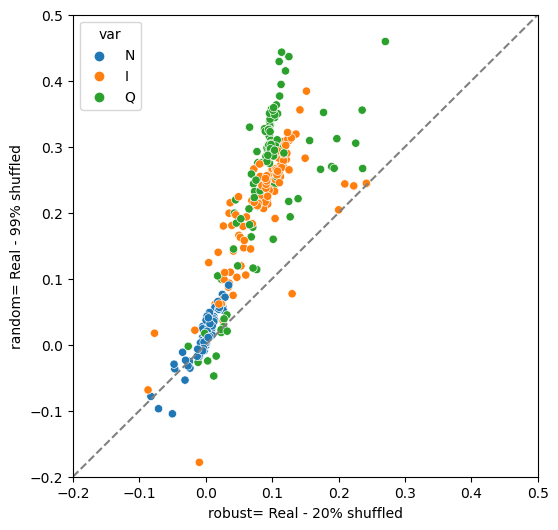

In [753]:
plt.figure(figsize=(6,6))
tmp=sns.scatterplot(data=H12,x='diff_x',y='diff_y',hue='var')#,bins=50,alpha=.3)
plt.xlim(-.2,.5)
plt.ylim(-.2,.5)
plt.plot([-.2, .5], [-.2, .5],ls='--',color='grey')
plt.xlabel('robust= Real - 20% shuffled')
plt.ylabel('random= Real - 99% shuffled')

In [788]:
FR0=pd.read_csv('SYNCSA_eval/rand0_FRall.csv')
FR0.rename(columns={'Unnamed: 0':'sample','cc.Simpson':'real_simpson','cc.FunRao':'real_Rao','cc.FunRedundancy':'real_FR','i':'type'},inplace=True)
FR0['sample']=FR0['sample'].str.split('_').str[0]
# FR_NIQ=FR.merge(NIQ,on=['sample','type'])

FR2=pd.read_csv('SYNCSA_eval/rand02_FRall.csv')
FR2.rename(columns={'Unnamed: 0':'sample','cc.Simpson':'robust_simpson','cc.FunRao':'robust_Rao','cc.FunRedundancy':'robust_FR','i':'type'},inplace=True)
FR2['sample']=FR2['sample'].str.split('_').str[0]
FR02=FR2.merge(FR0,on=['sample','type'])


FR9=pd.read_csv('SYNCSA_eval/rand9_FRall.csv')
FR9.rename(columns={'Unnamed: 0':'sample','cc.Simpson':'random_simpson','cc.FunRao':'random_Rao','cc.FunRedundancy':'random_FR','i':'type'},inplace=True)
FR9['sample']=FR9['sample'].str.split('_').str[0]
FR029=FR02.merge(FR9,on=['sample','type'])



In [817]:
# H12.columns=['sample','var','type','real','robust','tmp','tmp','random','tmp']
# del H12['tmp']
NIQ=H12.pivot(['sample','type'],columns='var')
NIQ.columns = [''.join(col) for col in NIQ.columns]
NIQ.reset_index(inplace=True)

# FR=pd.read_csv('SYNCSA_eval/rand0_FRall.csv')
# FR.rename(columns={'Unnamed: 0':'sample','cc.Simpson':'simpson','cc.FunRao':'Rao_Entropy','cc.FunRedundancy':'FR','i':'type'},inplace=True)
# FR['sample']=FR['sample'].str.split('_').str[0]
FR_NIQ=FR029.merge(NIQ,on=['sample','type'])

In [818]:
FR_NIQ.set_index(['sample','type'], inplace=True)
FR_NIQ=FR_NIQ.astype('float')
FR_NIQ.reset_index(inplace=True)

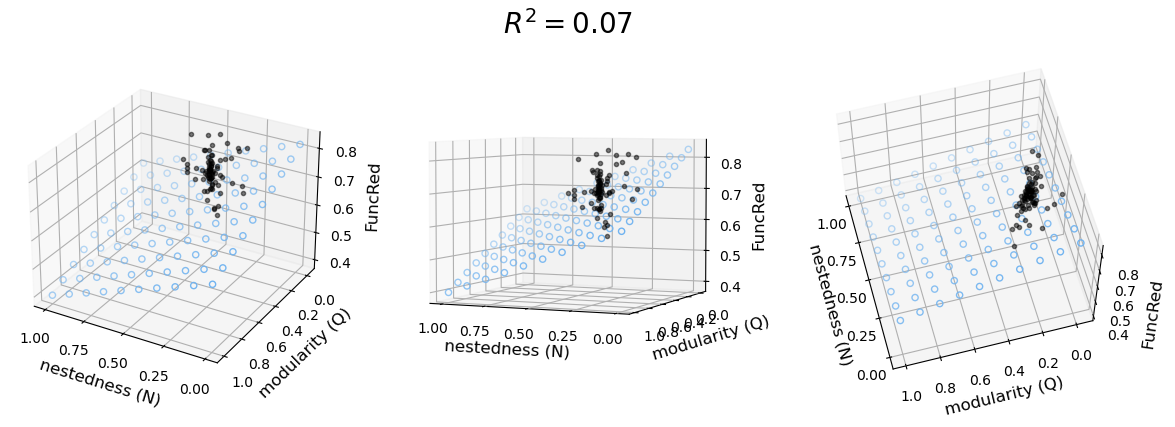

In [823]:
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

FRNQ=FR_NIQ[['sample','type','real_FR','realQ','realN']].dropna(how='any')

######################################## Data preparation #########################################

# file = 'https://aegis4048.github.io/downloads/notebooks/sample_data/unconv_MV_v5.csv'
# df = pd.read_csv(file)

X = np.array(FRNQ[['realQ','realN']])#df[['Por', 'Brittle']].values.reshape(-1,2)
Y = np.array(FRNQ['real_FR'])#df['Prod']

######################## Prepare model data point for visualization ###############################
# x = np.array(FRNQ['FR'])
# y = np.array(FRNQ['realQ'])
# z = np.array(FRNQ['realN'])

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(0, 1, 10)   # range of porosity values
y_pred = np.linspace(0, 1, 10)  # range of brittleness values
# z_pred = np.linspace(0, 1, 10)  # range of brittleness values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

################################################ Train #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

############################################## Evaluate ############################################

r2 = model.score(X, Y)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='.', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('nestedness (N)', fontsize=12)
    ax.set_ylabel('modularity (Q)', fontsize=12)
    ax.set_zlabel('FuncRed', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

# ax1.text2D(0.2, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
#            transform=ax1.transAxes, color='grey', alpha=0.5)
# ax2.text2D(0.3, 0.42, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
#            transform=ax2.transAxes, color='grey', alpha=0.5)
# ax3.text2D(0.85, 0.85, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
#            transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

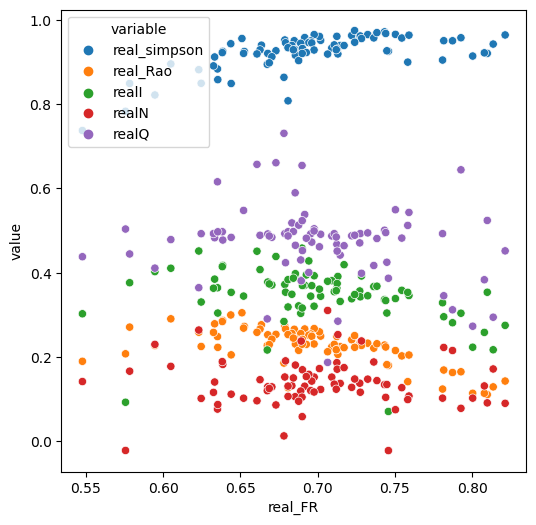

In [851]:
FR_II=FR_NIQ.filter(like='real',axis=1).melt('real_FR')
plt.figure(figsize=(6,6))
tmp=sns.scatterplot(data=FR_II,x='real_FR',y='value',hue='variable')
# plt.xlim(0,1)
# plt.ylim(0,1)
# plt.plot([0, 1], [0, 1],ls='--',color='grey')

In [ ]:
import matplotlib.pyplot as plt
def annotate(data, **kws):
    n = sum(FR_NIQ.filter(like='FR',axis=1)==FR_NIQ.filter(like='simpson',axis=1)-FR_NIQ.filter(like='Rao',axis=1))
    ax = plt.gca()
    ax.text(.1, .6, f"N = {n}", transform=ax.transAxes)

g = sns.FacetGrid(FR_NIQ.filter(like='FR',axis=1).melt(like='FR'), col="time")
g.map_dataframe(sns.scatterplot, x="total_bill", y="tip")
g.map_dataframe(annotate)

In [846]:
[sum(FR_NIQ['real_FR']==FR_NIQ['real_simpson']-FR_NIQ['real_Rao']),
sum(FR_NIQ['robust_FR']==FR_NIQ['robust_simpson']-FR_NIQ['robust_Rao']),
sum(FR_NIQ['random_FR']==FR_NIQ['random_simpson']-FR_NIQ['random_Rao'])]

[45, 34, 26]

In [852]:
FR_NIQ.filter(like='real',axis=1).melt(like='real_FR')


KeyboardInterrupt



In [652]:
def testprep(D):
    E0=D['N'].reset_index()
    E0=E0[['CLA_00ST','CLA_01ST','CLA_02ST']]
    E0['type']='N'

    E1=D['I'].reset_index()
    E1=E1[['CLA_00ST','CLA_01ST','CLA_02ST']]
    E1['type']='I'

    E2=D['Q'].reset_index()
    E2=E2[['CLA_00ST','CLA_01ST','CLA_02ST']]
    E2['type']='Q'
    E=E0.append(E1)
    E=E.append(E2)

    E0=D['N'].reset_index()
    E0=E0[['LEVO_00ST','LEVO_01ST','LEVO_02ST']]
    E0['type']='N'

    E1=D['I'].reset_index()
    E1=E1[['LEVO_00ST','LEVO_01ST','LEVO_02ST']]
    E1['type']='I'

    E2=D['Q'].reset_index()
    E2=E2[['LEVO_00ST','LEVO_01ST','LEVO_02ST']]
    E2['type']='Q'
    F=E0.append(E1)
    F=F.append(E2)

    E0=D['N'].reset_index()
    E0=E0[['OTHER_00ST','OTHER_01ST','OTHER_02ST']]
    E0['type']='N'

    E1=D['I'].reset_index()
    E1=E1[['OTHER_00ST','OTHER_01ST','OTHER_02ST']]
    E1['type']='I'

    E2=D['Q'].reset_index()
    E2=E2[['OTHER_00ST','OTHER_01ST','OTHER_02ST']]
    E2['type']='Q'
    G=E0.append(E1)
    G=G.append(E2)
    return E,F,G

In [646]:
from itertools import combinations

def ttest_run(c1, c2, E):
    N=E[E['type']=='N'][[c1,c2]]#.dropna(how='any')
    I=E[E['type']=='I'][[c1,c2]]#.dropna(how='any')
    Q=E[E['type']=='Q'][[c1,c2]]#.dropna(how='any')
    try:
        resultsA = stats.ttest_rel(N[c1],N[c2],axis=0, nan_policy='omit', alternative='two-sided')
        resultsB = stats.ttest_rel(I[c1],I[c2],axis=0, nan_policy='omit', alternative='two-sided')
        resultsC = stats.ttest_rel(Q[c1],Q[c2],axis=0, nan_policy='omit', alternative='two-sided')
        df = pd.DataFrame({'categ1': c1,
                           'categ2': c2,
                           'Ntstat': resultsA.statistic,
                           'Npvalue': resultsA.pvalue/2,
                           'Itstat': resultsB.statistic,
                           'Ipvalue': resultsB.pvalue/2,
                           'Qtstat': resultsC.statistic,
                           'Qpvalue': resultsC.pvalue/2,
                            'test':'paired'}, 
                           index = [0])
    except:
        resultsA = stats.ttest_rel(N[c1],N[c2])#, axis=0, nan_policy='omit', alternative='greater')
        resultsB = stats.ttest_rel(I[c1],I[c2])#,axis=0, nan_policy='omit', alternative='greater')
        resultsC = stats.ttest_rel(Q[c1],Q[c2])#,axis=0, nan_policy='omit', alternative='greater')
        df = pd.DataFrame({'categ1': c1,
                           'categ2': c2,
                           'Ntstat': resultsA.statistic,
                           'Npvalue': resultsA.pvalue,
                           'Itstat': resultsB.statistic,
                           'Ipvalue': resultsB.pvalue,
                           'Qtstat': resultsC.statistic,
                           'Qpvalue': resultsC.pvalue,
                          'test':'ind'}, 
                           index = [0])
    return df
df_list=pd.DataFrame()
for ii in [E,F,G]:
    c = [ttest_run(i, j, ii) for i, j in combinations(ii.columns[:3].unique().tolist(), 2)]
    df_list=df_list.append(c)

# final_df = pd.concat(df_list, ignore_index = True)

In [659]:
df_list=pd.DataFrame()
E,F,G=testprep(D0)
for ii in [E,F,G]:
    c = [ttest_run(i, j, ii) for i, j in combinations(ii.columns[:3].unique().tolist(), 2)]
    df_list=df_list.append(c)
df00=df_list
df00.set_index(['categ1','categ2'],inplace=True)#.astype('float')#-df02.astype('float')
del df00['test']
df00

Ntstat   Npvalue    Itstat   Ipvalue    Qtstat  \
categ1     categ2                                                         
CLA_00ST   CLA_01ST   -0.242080  0.405211 -0.514015  0.305568 -0.089810   
           CLA_02ST    2.749475  0.012540  1.233912  0.126127  1.330481   
CLA_01ST   CLA_02ST    0.400920  0.350217  0.330549  0.375329  0.285865   
LEVO_00ST  LEVO_01ST  -1.775525  0.053098 -0.822330  0.215030  0.618516   
           LEVO_02ST   0.844259  0.243706 -0.250876  0.412665 -0.533520   
LEVO_01ST  LEVO_02ST   2.318413  0.129622 -2.587080  0.117407 -3.470735   
OTHER_00ST OTHER_01ST  0.259152  0.399084 -0.607144  0.275294 -1.031577   
           OTHER_02ST -0.646978  0.317211 -0.887294  0.268986 -1.210668   
OTHER_01ST OTHER_02ST  0.836772  0.245387  0.887283  0.234269 -1.068172   

                        Qpvalue  
categ1     categ2                
CLA_00ST   CLA_01ST    0.464528  
           CLA_02ST    0.110017  
CLA_01ST   CLA_02ST    0.391628  
LEVO_00ST  LEVO_01ST   0.275032  
           LEVO_02ST   0.323513  
LEVO_01ST  LEVO_02ST   0.089294  
OTHER_00ST OTHER_01ST  0.157292  
           OTHER_02ST  0.219758  
OTHER_01ST OTHER_02ST  0.198645

In [657]:
df_list=pd.DataFrame()
E,F,G=testprep(D1)
for ii in [E,F,G]:
    c = [ttest_run(i, j, ii) for i, j in combinations(ii.columns[:3].unique().tolist(), 2)]
    df_list=df_list.append(c)
df02=df_list
df02.set_index(['categ1','categ2'],inplace=True)#.astype('float')#-df02.astype('float')
del df02['test']
df02

Ntstat   Npvalue    Itstat   Ipvalue    Qtstat  \
categ1     categ2                                                         
CLA_00ST   CLA_01ST    0.404902  0.344497 -0.526869  0.301465  0.051628   
           CLA_02ST    3.382464  0.005860  2.027705  0.041095  1.228695   
CLA_01ST   CLA_02ST    0.484365  0.321457  0.156787  0.439920 -0.100700   
LEVO_00ST  LEVO_01ST  -2.002405  0.036547 -1.077872  0.153202  0.566946   
           LEVO_02ST   0.895220  0.232570 -0.044050  0.484434 -0.704622   
LEVO_01ST  LEVO_02ST   2.991247  0.102696 -1.935162  0.151821 -1.885231   
OTHER_00ST OTHER_01ST -0.402763  0.345698 -1.068050  0.149110 -1.712871   
           OTHER_02ST -0.700303  0.305535 -0.563110  0.336754 -1.479740   
OTHER_01ST OTHER_02ST  0.675934  0.284384  1.208744  0.175137 -0.824324   

                        Qpvalue  
categ1     categ2                
CLA_00ST   CLA_01ST    0.479618  
           CLA_02ST    0.129443  
CLA_01ST   CLA_02ST    0.461306  
LEVO_00ST  LEVO_01ST   0.291626  
           LEVO_02ST   0.277022  
LEVO_01ST  LEVO_02ST   0.155240  
OTHER_00ST OTHER_01ST  0.051099  
           OTHER_02ST  0.189170  
OTHER_01ST OTHER_02ST  0.248209

In [658]:
df_list=pd.DataFrame()
E,F,G=testprep(D2)
for ii in [E,F,G]:
    c = [ttest_run(i, j, ii) for i, j in combinations(ii.columns[:3].unique().tolist(), 2)]
    df_list=df_list.append(c)
df99=df_list
df99.set_index(['categ1','categ2'],inplace=True)#.astype('float')#-df02.astype('float')
del df99['test']
df99

Ntstat   Npvalue    Itstat   Ipvalue    Qtstat  \
categ1     categ2                                                         
CLA_00ST   CLA_01ST   -0.086808  0.467097 -0.015138  0.494254  0.110282   
           CLA_02ST         NaN       NaN       NaN       NaN       NaN   
CLA_01ST   CLA_02ST    0.707133  0.253003  0.704721  0.253701  0.890618   
LEVO_00ST  LEVO_01ST  -2.141580  0.028940 -1.004541  0.169403  1.390603   
           LEVO_02ST   0.809802  0.251542  0.907112  0.230048 -0.857111   
LEVO_01ST  LEVO_02ST   3.203698  0.096307  3.817147  0.081557 -6.077224   
OTHER_00ST OTHER_01ST -0.756668  0.230897 -0.989850  0.169524  1.016822   
           OTHER_02ST -0.772696  0.290594 -0.775593  0.290017  0.953252   
OTHER_01ST OTHER_02ST  0.385000  0.368662  0.360304  0.376556 -1.306651   

                        Qpvalue  
categ1     categ2                
CLA_00ST   CLA_01ST    0.458238  
           CLA_02ST         NaN  
CLA_01ST   CLA_02ST    0.203713  
LEVO_00ST  LEVO_01ST   0.097257  
           LEVO_02ST   0.240847  
LEVO_01ST  LEVO_02ST   0.051912  
OTHER_00ST OTHER_01ST  0.163245  
           OTHER_02ST  0.257617  
OTHER_01ST OTHER_02ST  0.160688

In [662]:
cjj=(df00[['Npvalue','Ipvalue','Qpvalue']]-df02[['Npvalue','Ipvalue','Qpvalue']])
cjj.reset_index(inplace=True)
CJ=cjj.melt(['categ1','categ2'])
CJ.rename(columns={'value':'robust_val'},inplace=True)

cjj=(df00[['Npvalue','Ipvalue','Qpvalue']]-df99[['Npvalue','Ipvalue','Qpvalue']])
cjj.reset_index(inplace=True)
CJ2=cjj.melt(['categ1','categ2'])
CJ2.rename(columns={'value':'random_val'},inplace=True)

WWW=CJ.merge(CJ2,on=['categ1','categ2','variable'])


Text(0, 0.5, 'robustness= Real - 99% shuffled, ie random')

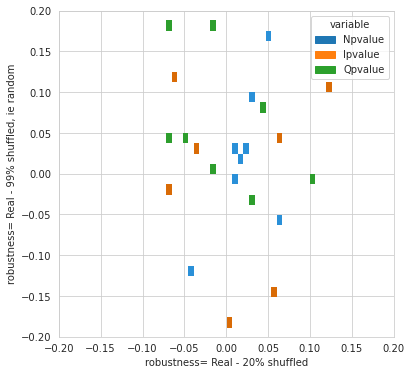

In [663]:
plt.figure(figsize=(6,6))
tmp=sns.histplot(data=WWW,x='robust_val',y='random_val',hue='variable',bins=30)
plt.xlim(-.2,.2)
plt.ylim(-.2,.2)
plt.xlabel('robustness= Real - 20% shuffled')
plt.ylabel('robustness= Real - 99% shuffled, ie random')

Text(0, 0.5, 'robustness= Real - 99% shuffled, ie random')

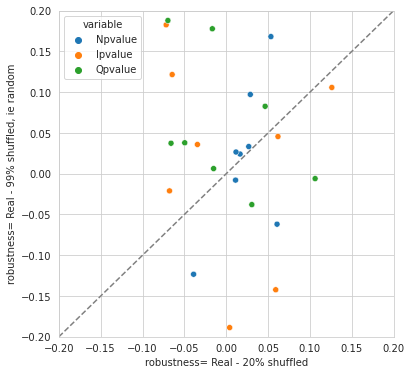

In [664]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=WWW,x='robust_val',y='random_val',hue='variable')#,bins=30)
plt.xlim(-.2,.2)
plt.ylim(-.2,.2)
plt.plot([-.2, 1], [-.2, 1],ls='--',color='grey')
plt.xlabel('robustness= Real - 20% shuffled')
plt.ylabel('robustness= Real - 99% shuffled, ie random')

In [564]:
# del C['sample']
Cm=C.melt(['name','type'])
# del Cm['init']
Cm.value=pd.to_numeric(Cm.value)
Cm.sort_values(by=['type'],inplace=True)

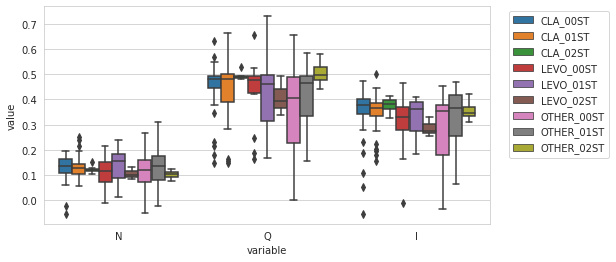

In [565]:
box_pairs=[
    
    #     (('cc.FunRedundancy', 'CLA_00ST'), ('cc.FunRedundancy', 'LEVO_00ST')),
    # (('cc.FunRedundancy', 'CLA_01ST'), ('cc.FunRedundancy', 'LEVO_01ST')),
    # (('cc.FunRedundancy', 'CLA_02ST'), ('cc.FunRedundancy', 'LEVO_02ST')),
(('N', 'CLA_00ST'),( 'N', 'CLA_01ST')),
       # (('N', 'CLA_00ST'), ('N', 'CLA_02ST')),
       # (('N', 'CLA_01ST'), ('N', 'CLA_02ST')),
      (('N', 'LEVO_00ST'),( 'N', 'LEVO_01ST')),
       # (('N', 'LEVO_00ST'), ('N', 'LEVO_02ST')),
    # (('N', 'LEVO_01ST'), ('N', 'LEVO_02ST')),
    # (('N', 'CLA_00ST'), ('N', 'LEVO_01ST')),
    #  (('N', 'CLA_01ST'), ('N', 'OTHER_02ST')),
    #  (('N', 'OTHER_00ST'), ('N', 'LEVO_02ST')),
    
 (('I', 'CLA_00ST'),( 'I', 'CLA_01ST')),
       # (('I', 'CLA_00ST'), ('I', 'CLA_02ST')),
       # (('I', 'CLA_01ST'), ('I', 'CLA_02ST')),
      (('I', 'LEVO_00ST'),( 'I', 'LEVO_01ST')),
    #    (('I', 'LEVO_00ST'), ('I', 'LEVO_02ST')),
    # (('I', 'LEVO_01ST'), ('I', 'LEVO_02ST')),
    # (('I', 'CLA_00ST'), ('I', 'LEVO_01ST')),
    #  (('I', 'CLA_01ST'), ('I', 'OTHER_02ST')),
    #  (('I', 'OTHER_00ST'), ('I', 'LEVO_02ST')),
    
 (('Q', 'CLA_00ST'),( 'Q', 'CLA_01ST')),
       # (('Q', 'CLA_00ST'), ('Q', 'CLA_02ST')),
       # (('Q', 'CLA_01ST'), ('Q', 'CLA_02ST')),
      (('Q', 'LEVO_00ST'),( 'Q', 'LEVO_01ST')),
    #    (('Q', 'LEVO_00ST'), ('Q', 'LEVO_02ST')),
    # (('Q', 'LEVO_01ST'), ('Q', 'LEVO_02ST')),
    # (('Q', 'CLA_00ST'), ('Q', 'LEVO_01ST')),
    #  (('Q', 'CLA_01ST'), ('Q', 'OTHER_02ST')),
    #  (('Q', 'OTHER_00ST'), ('Q', 'LEVO_02ST'))
]
    # (('cc.FunRedundancy', 'OTHER_00ST'),( 'cc.FunRedundancy', 'OTHER_01ST'))]#,
       # (('cc.FunRedundancy', 'CLA_00ST'), ('cc.FunRedundancy', 'CLA_02ST')),]#,
plt.figure(figsize=(8,4))
# B.dropna(inplace=True)
# B=B.reset_index()
# C=B[B[typ]>0]
ax=sns.boxplot(data=www,y='value',x='variable',hue='type')

# add_stat_annotation(ax, data=Cm, x='variable', y='value',hue='type',
#                     box_pairs=box_pairs,#comparisons,
#                     test='t-test_paired', text_format='star', loc='outside', verbose=0)
# annotator =Annotator(ax, data=Cm, x='variable', y='value',hue='type',pairs=box_pairs)#comparisons,
# annotator.configure(test='Levene', text_format='star', loc='outside')
# annotator.apply_and_annotate()

# t-test_ind, t-test_welch, t-test_paired, Mann-Whitney, Mann-Whitney-gt, Mann-Whitney-ls, Levene, Wilcoxon, Kruskal
###change to paired when all samples are finished
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))

# plt.savefig(".png",dpi=300,bbox_inches = "tight")

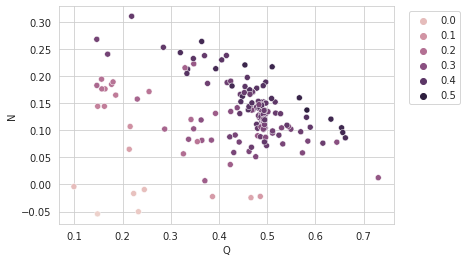

In [387]:
ax=sns.scatterplot(data=C,y='N',x='Q',hue='I')
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))

# Redundancy = taxon diversity - functional diversity

In [7]:
relgene=pd.read_csv('all_arg_subset_genefamilies-cpm.tsv',sep='\t',nrows=1)
graphs = load_list_of_dicts('data/gcn/NX_Emore_ARG.pkl')

ARG_meta=pd.read_excel('run/gcn/ARG_treatment_infor_modified.xlsx',index_col=0)
ARG_meta2=pd.read_excel('run/gcn/patients_Tx_batch3_for_DM.xlsx',index_col=None,skiprows=1,names=['id','group'])
relgene.columns=relgene.columns.str.replace("-00", "-00ST")
relgene.columns=relgene.columns.str.replace("-00STST", "-00ST")
relgene.columns=relgene.columns.str.split('-').str[0]+'-'+relgene.columns.str.split('-').str[1]
ARG_meta['id']=ARG_meta['id'].str.replace('-00ST','')
META=pd.concat([pd.DataFrame(ARG_meta[['id','group']]),ARG_meta2],ignore_index=True)


In [16]:
JEFF=pd.DataFrame()
deg_rand=0

# def makeSYNCSAnet(graphs,JEFF,META,deg_rand):
# for i,net in tqdm.tqdm(enumerate(BX_graphs)):
# for ii,i in tqdm():
for ii,i in tqdm(enumerate(relgene.columns[1:])):
    ccc=nx.convert_matrix.to_pandas_edgelist(graphs[ii])
    ee=nx.convert_matrix.to_pandas_edgelist(graphs[ii])
    # cc['weight']=np.random.randn(len(cc))
    pww=i
    j=(i.split('-')[1])
    i=(i.split('-')[0])
    try:
        rrr=str(META[META['id']==i].index.item())+'_'+str(META[META['id']==i]['group'].item())+'_'+str(j)
        ccc.rename(columns={ccc.columns[2]:rrr},inplace=True)
        ddd=ccc[ccc['source'].str.contains('UniRef')]
        ddd[['source','target']] = ddd[['target','source']]
        ccc=ccc[~ccc['source'].str.contains('UniRef')].append(ddd)
        if deg_rand!=0:
            aa=pd.DataFrame(ccc)
            pcc=aa.sample(frac=np.float(deg_rand), replace=False, random_state=1) ##degree randomized
            pol=aa[~aa.isin(pcc)].dropna(how='all')
            pcc.reset_index(inplace=True)
            del pcc['index']
            lll=shuffle_net(pcc)
            ccc=pd.concat([pol,lll])
            del aa,pol,pcc,lll
    

    # a,b=pd.factorize(ccc['source']) 
    # c,d=pd.factorize(ccc['target'])
    # rrr=pd.DataFrame()
    # rrr['from']=a
    # rrr['to']=c
    # rrr['value']=1
    # sss=str(META[META['id']==i]['group'].item())+'_'+str(j)
    # Path('~/nest/'+sss).mkdir(parents=True, exist_ok=True)
    # rrr[['from','to','value']].to_csv('~/nest/'+sss+'/'+str(ccc.columns[2])+'.csv',sep=' ',index=False,header=False)
    # ee.rename(columns={ee.columns[2]:sss},inplace=True)
    # print(ii)
        if ii==0:
            dd=ccc
            # ff=ee
        else:
            dd=dd.merge(ccc,on=['source','target'],how='outer')
        # ff=ff.merge(ee,on=['source','target'],how='outer')
# return dd/
        del ddd,rrr,ccc,ee
    except:
        print('no match for '+str(i))


104it [00:35,  3.23it/s]

no match for ARG073
no match for ARG073


138it [00:55,  2.50it/s]


In [ ]:
names=pd.unique(dd.columns.str.split('_').str[1]+'_'+dd.columns.str.split('_').str[2])[1:]
for i in tqdm(names):
# def group4SYNCSA(i,dd,DR):
    # ff.columns = ff.columns.str.strip('_x')
    # ff.columns = ff.columns.str.strip('_y')
    # i=i.split('_')[1]+'_'+i.split('_')[2]
    ff=dd.loc[:,dd.columns.str.contains(i)]
    ff[['source','target']]=dd[['source','target']]
    ff=ff[ff['source'].str.contains('s__')]
    ff=ff[ff['target'].str.contains('UniRef')]
    comm=ff.groupby('source').sum().transpose()
    comm.to_csv('~/SYNCSA_eval/'+str(deg_rand)+'_rand_comm_'+i+'.csv')
    ff.reset_index(inplace=True)
    ff.set_index(['source', 'target'], inplace=True)
    del ff['index']
    ff.columns=(ff.columns.str.split('_').str[1]+'_'+ff.columns.str.split('_').str[2])
    gg=ff.groupby(by=ff.columns, axis=1).sum()
    # traits=gg[[i]].reset_index().pivot('source','target',i).dropna(how='all',axis=1).replace(np.nan,0)
    traits=gg[[i]].reset_index().groupby(['source','target']).mean().reset_index().pivot('source','target',i).dropna(how='all',axis=1).replace(np.nan,0)

    traits.to_csv('~/SYNCSA_eval/'+str(deg_rand)+'_rand_trait_'+i+'.csv')

### process in R


In [ ]:
!Rscript ~/run/gcn/calc_FR.r -d 0
!Rscript ~/run/gcn/calc_FR.r -d 0.2
!Rscript ~/run/gcn/calc_FR.r 0.99
# library('SYNCSA')

# files <- data.frame('CLA_00ST','CLA_01ST','CLA_02ST','LEVO_00ST','LEVO_01ST',
#                     'LEVO_02ST','OTHER_00ST','OTHER_01ST','OTHER_02ST')
# for (i in files){
# trait=read.csv(paste('~/SYNCSA_eval/trait_',i,'.csv',sep=''))
# comm=read.csv(paste('~/SYNCSA_eval/comm_',i,'.csv',sep=''))
# row.names(trait)<-trait$source
# trait$source<-NULL
# row.names(comm)<-comm$X
# comm$X<-NULL
# cc=rao.diversity(comm, traits =trait)
# write.csv(data.frame(cc$Simpson,cc$FunRao,cc$FunRedundancy,i),paste('~/SYNCSA_eval/FR_',i,'.csv',sep=''))
# # }

In [347]:
!cat SYNCSA_eval/0rand_FR* >SYNCSA_eval/rand00_FRall.csv
!cat SYNCSA_eval/0.2rand_FR* >SYNCSA_eval/rand02_FRall.csv
!cat SYNCSA_eval/0.9rand_FR* >SYNCSA_eval/rand9_FRall.csv

In [350]:
FR=pd.read_csv('SYNCSA_eval/rand0_FRall.csv')
FR=FR[FR['Unnamed: 0']!='NaN']
FR=FR[FR['Unnamed: 0']!=np.nan]
FR=FR[FR['cc.Simpson']!='cc.Simpson']
FR['Unnamed: 0']=FR['Unnamed: 0'].str.split('_').str[1]+'_'+FR['Unnamed: 0'].str.split('_').str[2]
del FR['i']#,FR['Unnamed: 0'],
FR.rename(columns={'Unnamed: 0':'index'},inplace=True)
FRm00=FR.melt('index')
FRm00.value=pd.to_numeric(FRm00.value)


FR=pd.read_csv('SYNCSA_eval/rand02_FRall.csv')
FR=FR[FR['Unnamed: 0']!='NaN']
FR=FR[FR['Unnamed: 0']!=np.nan]
FR=FR[FR['cc.Simpson']!='cc.Simpson']
FR['Unnamed: 0']=FR['Unnamed: 0'].str.split('_').str[1]+'_'+FR['Unnamed: 0'].str.split('_').str[2]
FR.rename(columns={'Unnamed: 0':'index'},inplace=True)
del FR['i']#,FR['Unnamed: 0'],
FRm02=FR.melt('index')
FRm02.value=pd.to_numeric(FRm02.value)

FR=pd.read_csv('SYNCSA_eval/rand9_FRall.csv')
FR=FR[FR['Unnamed: 0']!='NaN']
FR=FR[FR['Unnamed: 0']!=np.nan]
FR=FR[FR['cc.Simpson']!='cc.Simpson']
FR['Unnamed: 0']=FR['Unnamed: 0'].str.split('_').str[1]+'_'+FR['Unnamed: 0'].str.split('_').str[2]
FR.rename(columns={'Unnamed: 0':'index'},inplace=True)
del FR['i']#,FR['Unnamed: 0'],
FRm9=FR.melt('index')
FRm9.value=pd.to_numeric(FRm9.value)

In [351]:
box_pairs=[
    
(('cc.Simpson', 'CLA_00ST'),( 'cc.Simpson', 'CLA_01ST')),
       (('cc.Simpson', 'CLA_00ST'), ('cc.Simpson', 'CLA_02ST')),
    (('cc.Simpson', 'CLA_01ST'), ('cc.Simpson', 'CLA_02ST')),
      (('cc.Simpson', 'LEVO_00ST'),( 'cc.Simpson', 'LEVO_01ST')),
       (('cc.Simpson', 'LEVO_00ST'), ('cc.Simpson', 'LEVO_02ST')),
    (('cc.Simpson', 'LEVO_01ST'), ('cc.Simpson', 'LEVO_02ST')),
          (('cc.Simpson', 'OTHER_00ST'),( 'cc.Simpson', 'OTHER_01ST')),
       (('cc.Simpson', 'OTHER_00ST'), ('cc.Simpson', 'OTHER_02ST')),
           (('cc.Simpson', 'OTHER_01ST'), ('cc.Simpson', 'OTHER_02ST')),
    
(('cc.FunRedundancy', 'CLA_00ST'),( 'cc.FunRedundancy', 'CLA_01ST')),
       (('cc.FunRedundancy', 'CLA_00ST'), ('cc.FunRedundancy', 'CLA_02ST')),
    (('cc.FunRedundancy', 'CLA_01ST'), ('cc.FunRedundancy', 'CLA_02ST')),
      (('cc.FunRedundancy', 'LEVO_00ST'),( 'cc.FunRedundancy', 'LEVO_01ST')),
       (('cc.FunRedundancy', 'LEVO_00ST'), ('cc.FunRedundancy', 'LEVO_02ST')),
    (('cc.FunRedundancy', 'LEVO_01ST'), ('cc.FunRedundancy', 'LEVO_02ST')),
          (('cc.FunRedundancy', 'OTHER_00ST'),( 'cc.FunRedundancy', 'OTHER_01ST')),
       (('cc.FunRedundancy', 'OTHER_00ST'), ('cc.FunRedundancy', 'OTHER_02ST')),
           (('cc.FunRedundancy', 'OTHER_01ST'), ('cc.FunRedundancy', 'OTHER_02ST')),
    
    
(('cc.FunRao', 'CLA_00ST'),( 'cc.FunRao', 'CLA_01ST')),
       (('cc.FunRao', 'CLA_00ST'), ('cc.FunRao', 'CLA_02ST')),
    (('cc.FunRao', 'CLA_01ST'), ('cc.FunRao', 'CLA_02ST')),
      (('cc.FunRao', 'LEVO_00ST'),( 'cc.FunRao', 'LEVO_01ST')),
       (('cc.FunRao', 'LEVO_00ST'), ('cc.FunRao', 'LEVO_02ST')),
    (('cc.FunRao', 'LEVO_01ST'), ('cc.FunRao', 'LEVO_02ST')),
          (('cc.FunRao', 'OTHER_00ST'),( 'cc.FunRao', 'OTHER_01ST')),
       (('cc.FunRao', 'OTHER_00ST'), ('cc.FunRao', 'OTHER_02ST')),
           (('cc.FunRao', 'OTHER_01ST'), ('cc.FunRao', 'OTHER_02ST'))
]
    # (('cc.FunRedundancy', 'OTHER_00ST'),( 'cc.FunRedundancy', 'OTHER_01ST'))]#,
       # (('cc.FunRedundancy', 'CLA_00ST'), ('cc.FunRedundancy', 'CLA_02ST')),]#,

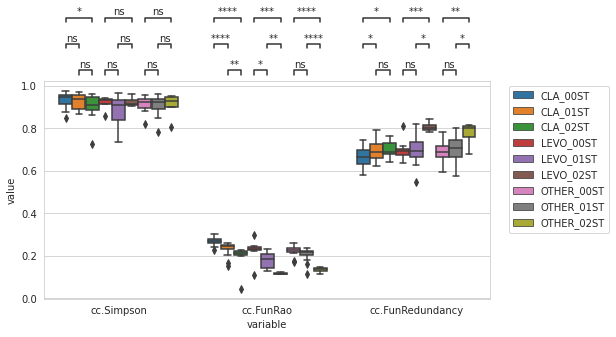

In [352]:
# def plt_plect(B,typ):
plt.figure(figsize=(8,4))
# B.dropna(inplace=True)
# B=B.reset_index()
# C=B[B[typ]>0]
ax=sns.boxplot(data=FRm00,y='value',x='variable',hue='index')

annotator =Annotator(ax, data=FRm00, x='variable', y='value',hue='index',pairs=box_pairs,verbose=0)#comparisons,
annotator.configure(test='t-test_ind', text_format='star', loc='outside')
annotator.apply_and_annotate()
# add_stat_annotation(ax, data=FRm, x='variable', y='value',hue='index',
#                     box_pairs=box_pairs,#comparisons,
#                     test='t-test_ind', text_format='star', loc='outside', verbose=0)
###change to paired when all samples are finished
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.savefig("FR00.png",dpi=300,bbox_inches = "tight")

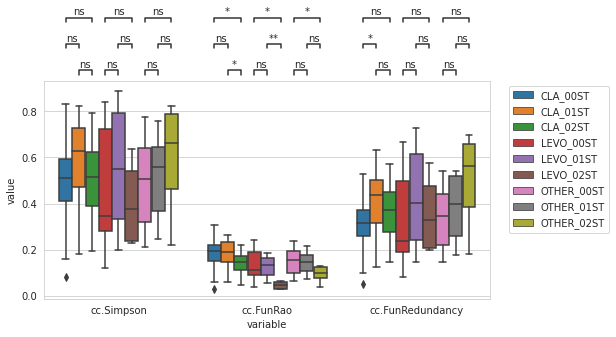

In [353]:
# def plt_plect(B,typ):
plt.figure(figsize=(8,4))
# B.dropna(inplace=True)
# B=B.reset_index()
# C=B[B[typ]>0]
ax=sns.boxplot(data=FRm02,y='value',x='variable',hue='index')

annotator =Annotator(ax, data=FRm02, x='variable', y='value',hue='index',pairs=box_pairs,verbose=0)#comparisons,
annotator.configure(test='t-test_ind', text_format='star', loc='outside')
annotator.apply_and_annotate()
# add_stat_annotation(ax, data=FRm, x='variable', y='value',hue='index',
#                     box_pairs=box_pairs,#comparisons,
#                     test='t-test_ind', text_format='star', loc='outside', verbose=0)
###change to paired when all samples are finished
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.savefig("FR02.png",dpi=300,bbox_inches = "tight")

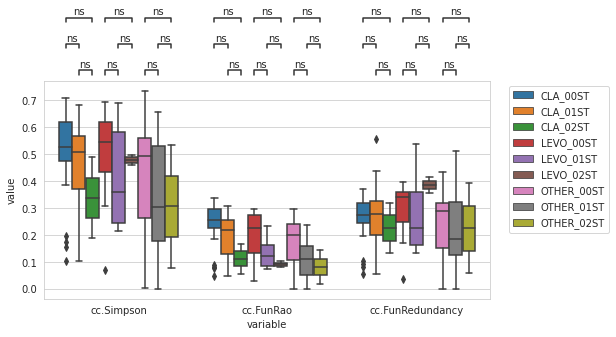

In [354]:
# def plt_plect(B,typ):
plt.figure(figsize=(8,4))
# B.dropna(inplace=True)
# B=B.reset_index()
# C=B[B[typ]>0]
ax=sns.boxplot(data=FRm9,y='value',x='variable',hue='index')

annotator =Annotator(ax, data=FRm9, x='variable', y='value',hue='index',pairs=box_pairs,verbose=0)#comparisons,
annotator.configure(test='t-test_ind', text_format='star', loc='outside')
annotator.apply_and_annotate()
# add_stat_annotation(ax, data=FRm, x='variable', y='value',hue='index',
#                     box_pairs=box_pairs,#comparisons,
#                     test='t-test_ind', text_format='star', loc='outside', verbose=0)
###change to paired when all samples are finished
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.savefig("FR9.png",dpi=300,bbox_inches = "tight")

In [355]:
# # cat rand.2_FR* >rand02_FRall.csv
FR=pd.read_csv('SYNCSA_eval/rand0_FRall.csv')
FR=FR[FR['Unnamed: 0']!='NaN']
FR=FR[FR['Unnamed: 0']!=np.nan]
FR=FR[FR['cc.Simpson']!='cc.Simpson']
# FR['Unnamed: 0']=FR['Unnamed: 0'].str.split('_').str[1]+'_'+FR['Unnamed: 0'].str.split('_').str[2]
del FR['i']#,FR['Unnamed: 0'],
FR.rename(columns={'Unnamed: 0':'index'},inplace=True)
FRm00=FR.melt('index')

FRm00.value=pd.to_numeric(FRm00.value)

# cat .2rand_FR* >rand02_FRall.csv
FR=pd.read_csv('SYNCSA_eval/rand02_FRall.csv')
FR=FR[FR['Unnamed: 0']!='NaN']
FR=FR[FR['Unnamed: 0']!=np.nan]
FR=FR[FR['cc.Simpson']!='cc.Simpson']
# FR['Unnamed: 0']=FR['Unnamed: 0'].str.split('_').str[1]+'_'+FR['Unnamed: 0'].str.split('_').str[2]
FR.rename(columns={'Unnamed: 0':'index'},inplace=True)
del FR['i']#,FR['Unnamed: 0'],

FRm02=FR.melt('index')

FRm02.value=pd.to_numeric(FRm02.value)

# # cat rand.2_FR* >rand02_FRall.csv
FR=pd.read_csv('SYNCSA_eval/rand9_FRall.csv')
FR=FR[FR['Unnamed: 0']!='NaN']
FR=FR[FR['Unnamed: 0']!=np.nan]
FR=FR[FR['cc.Simpson']!='cc.Simpson']
# FR['Unnamed: 0']=FR['Unnamed: 0'].str.split('_').str[1]+'_'+FR['Unnamed: 0'].str.split('_').str[2]
FR.rename(columns={'Unnamed: 0':'index'},inplace=True)
del FR['i']#,FR['Unnamed: 0'],

FRm9=FR.melt('index')

FRm9.value=pd.to_numeric(FRm9.value)

In [365]:
FR02=FRm00.merge(FRm02,on=['index','variable'])
FR02['diff']=FR02['value_x']-FR02['value_y']
FR09=FRm00.merge(FRm9,on=['index','variable'])
FR09['diff']=FR09['value_x']-FR09['value_y']
FR29=FR02[['index','variable','diff']].merge(FR09[['index','variable','diff']],on=['index','variable'])

Text(0, 0.5, 'random= Real - 90% shuffled')

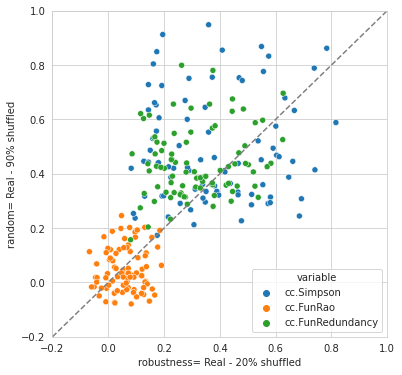

In [368]:
plt.figure(figsize=(6,6))
tmp=sns.scatterplot(data=FR29,x=(FR29['diff_x']),y=(FR29['diff_y']),hue='variable')#,bins=50,alpha=.3)
plt.xlim(-.2,1)
plt.ylim(-.2,1)
plt.plot([-.2, 1], [-.2, 1],ls='--',color='grey')
plt.xlabel('robustness= Real - 20% shuffled')
plt.ylabel('random= Real - 90% shuffled')

# ttest diff Ab

In [555]:
names=('CLA_00ST','CLA_01ST','CLA_02ST','LEVO_00ST','LEVO_01ST',
                    'LEVO_02ST','OTHER_00ST','OTHER_01ST','OTHER_02ST')
FR=pd.DataFrame()
for ii,i in enumerate(names):
    j=pd.read_csv('SYNCSA_eval/0_rand_comm_'+i+'.csv')
    if ii==0:
        FR=(j)
    else:
        FR=FR.append(j)
FR['Unnamed: 0']=FR['Unnamed: 0'].str.split('_').str[1]+'_'+FR['Unnamed: 0'].str.split('_').str[2]
FR_00Ab=FR.melt('Unnamed: 0')
FR_00Ab=FR_00Ab[FR_00Ab['value']!=0]

In [556]:
FR_00Ab['spec']=FR_00Ab['variable'].str.split('_').str[2]
# spFR_00Ab=FR_00Ab.groupby(['spec','Unnamed: 0']).sum()
# spFR_00Ab.reset_index(inplace=True)
FR_00Ab['trx']=FR_00Ab['Unnamed: 0'].str.split('_').str[0]
FR_00Ab['time']=FR_00Ab['Unnamed: 0'].str.split('_').str[1].str.split('ST').str[0]

In [233]:
FR_00Ab[FR_00Ab['spec'].isin(np.unique(FR_00Ab['spec'])[0:10])]

,Unnamed: 0,variable,value,spec,trx,time
12,CLA_00ST,s__Absiella_dolichum,79.189888,Absiella,CLA,00
41,CLA_01ST,s__Absiella_dolichum,143.501385,Absiella,CLA,01
62,CLA_02ST,s__Absiella_dolichum,52.681394,Absiella,CLA,02
99,OTHER_00ST,s__Absiella_dolichum,94.027473,Absiella,OTHER,00
101,OTHER_00ST,s__Absiella_dolichum,119.974835,Absiella,OTHER,00
...,...,...,...,...,...,...
3236,LEVO_02ST,s__Anaerofilum_sp_An201,149.225099,Anaerofilum,LEVO,02
3276,CLA_00ST,s__Anaerofustis_stercorihominis,127.296860,Anaerofustis,CLA,00
3300,CLA_00ST,s__Anaerofustis_stercorihominis,27.206735,Anaerofustis,CLA,00
3334,CLA_02ST,s__Anaerofustis_stercorihominis,71.570302,Anaerofustis,CLA,02


In [515]:
rr=pd.DataFrame(columns=['spec','p01','p02','p12'])
# rr=[]
# cc=pd.DataFrame(columns=['spec','p01','p02','p12'])
for j in np.unique(FR_00Ab['trx']):
    for i in np.unique(FR_00Ab['spec']):
        data=FR_00Ab[FR_00Ab['spec']==i]
        data=data[data['trx']==j]
        bb=stats.ttest_ind(data[data['time']=='00']['value'],data[data['time']=='01']['value'],axis=0, nan_policy='omit', alternative='two-sided')
        dd=stats.ttest_ind(data[data['time']=='00']['value'],data[data['time']=='02']['value'],axis=0, nan_policy='omit', alternative='two-sided')
        ee=stats.ttest_ind(data[data['time']=='01']['value'],data[data['time']=='02']['value'],axis=0, nan_policy='omit', alternative='two-sided')
        cc = pd.DataFrame({'spec': i,
                               'p01': bb.pvalue,
                               'p02': dd.pvalue,
                               'p12': ee.pvalue,
                                'type':j},
                               index = [0])
        rr=rr.append(cc)#,ignore_index=True)

In [551]:
rrr=rr[~((rr['spec']=='Streptococcus')&(rr['type']=='OTHER'))]
rrr=rrr.melt(['spec','type'])
rrr=rrr[(rrr['value']<.05)].sort_values('type')
rrr.pivot(['spec','type'],columns='variable').dropna(how='all')

value                    
variable                          p01       p02       p12
spec                  type                               
Anaerostipes          OTHER  0.010109       NaN       NaN
Bacteroides           CLA    0.014857  0.000009  0.015214
                      LEVO        NaN  0.013414  0.036326
Bifidobacterium       OTHER       NaN   0.02473  0.029508
Clostridium           CLA         NaN  0.033731       NaN
                      LEVO        NaN  0.008421       NaN
Coprococcus           OTHER  0.027043       NaN       NaN
Faecalibacterium      OTHER       NaN  0.009466       NaN
Haemophilus           LEVO   0.015488       NaN       NaN
Intestinibacter       CLA    0.029049       NaN       NaN
Intestinimonas        CLA    0.003242   0.01935       NaN
Klebsiella            CLA    0.047417       NaN       NaN
Lachnospira           LEVO        NaN       NaN   0.01374
Lactobacillus         OTHER  0.000142       NaN       NaN
Megasphaera           OTHER       NaN       NaN  0.042108
Parabacteroides       CLA         NaN  0.004713       NaN
Phascolarctobacterium CLA    0.024164       NaN       NaN
                      OTHER       NaN  0.007889       NaN
Roseburia             CLA    0.006543  0.010205       NaN
                      LEVO        NaN       NaN  0.031183
Ruminococcus          CLA    0.044023       NaN       NaN
                      OTHER       NaN  0.005835  0.028835
Sellimonas            CLA         NaN  0.009587       NaN
Streptococcus         LEVO   0.036825       NaN       NaN
Veillonella           CLA     0.01274       NaN       NaN

In [625]:
rrr.groupby(['spec','type']).count()

variable  value
spec                  type                  
Anaerostipes          OTHER         1      1
Bacteroides           CLA           3      3
                      LEVO          2      2
Bifidobacterium       OTHER         2      2
Clostridium           CLA           1      1
                      LEVO          1      1
Coprococcus           OTHER         1      1
Faecalibacterium      OTHER         1      1
Haemophilus           LEVO          1      1
Intestinibacter       CLA           1      1
Intestinimonas        CLA           2      2
Klebsiella            CLA           1      1
Lachnospira           LEVO          1      1
Lactobacillus         OTHER         1      1
Megasphaera           OTHER         1      1
Parabacteroides       CLA           1      1
Phascolarctobacterium CLA           1      1
                      OTHER         1      1
Roseburia             CLA           2      2
                      LEVO          1      1
Ruminococcus          CLA           1      1
                      OTHER         2      2
Sellimonas            CLA           1      1
Streptococcus         LEVO          1      1
Veillonella           CLA           1      1

In [578]:
FR_00Ab['value']=np.log(FR_00Ab['value'])

In [580]:
FRcalc=FR_00Ab.groupby(['spec','trx','time']).sum().reset_index()
FRcalc=FRcalc.pivot(['spec','trx'],columns='time').reset_index()
# rrr.pivot(['spec','type'],columns='variable').dropna(how='all')
FRcalc.columns=['spec','trx','00','01','02']

In [587]:
AA=FRcalc[FRcalc['trx']=='CLA']


,spec,trx,00,01,02
0,Absiella,CLA,4.371849,4.966345,3.964262
1,Absiella,OTHER,9.330869,NaN,NaN
2,Acidaminococcus,CLA,32.727779,12.885183,5.441014
3,Acidaminococcus,LEVO,10.693938,4.129389,3.255096
4,Acidaminococcus,OTHER,15.649891,12.164582,4.526186
...,...,...,...,...,...
265,Veillonella,CLA,10.628764,36.143829,24.089361
266,Veillonella,LEVO,-1.928519,76.978832,-0.090569
267,Veillonella,OTHER,2.772293,4.341739,5.650152
268,Victivallis,CLA,-0.373891,1.355662,1.459003


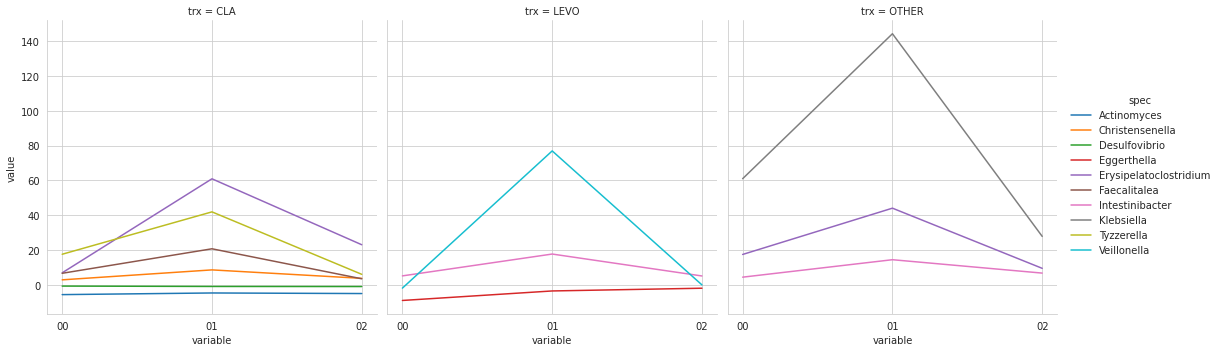

In [613]:

CLA_hill=FRcalc[(FRcalc['00']<FRcalc['01']/2)&(FRcalc['01']/2>FRcalc['02'])]
CLA_hill=CLA_hill.melt(['spec','trx'])
# sns.lineplot(data=CLA_hill, x="variable", y="value", hue="spec")
sns.relplot(
    data=CLA_hill, x="variable", y="value",
    col="trx", hue="spec",#, style="event",
    kind="line",col_order=['CLA','LEVO','OTHER']#,x_order=['00ST','01ST','02ST']
)

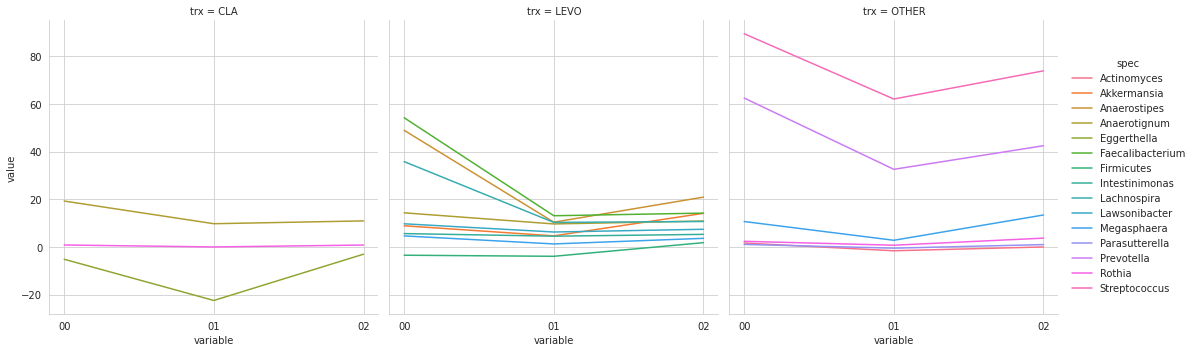

In [623]:

CLA_val=FRcalc[(FRcalc['00']>FRcalc['01'])&(FRcalc['01']<FRcalc['02'])]
CLA_val=CLA_val.melt(['spec','trx'])
# sns.lineplot(data=CLA_hill, x="variable", y="value", hue="spec")
sns.relplot(
    data=CLA_val, x="variable", y="value",
    col="trx", hue="spec",#, style="event",
    kind="line",col_order=['CLA','LEVO','OTHER']#,x_order=['00ST','01ST','02ST']
)

<Figure size 720x576 with 0 Axes>

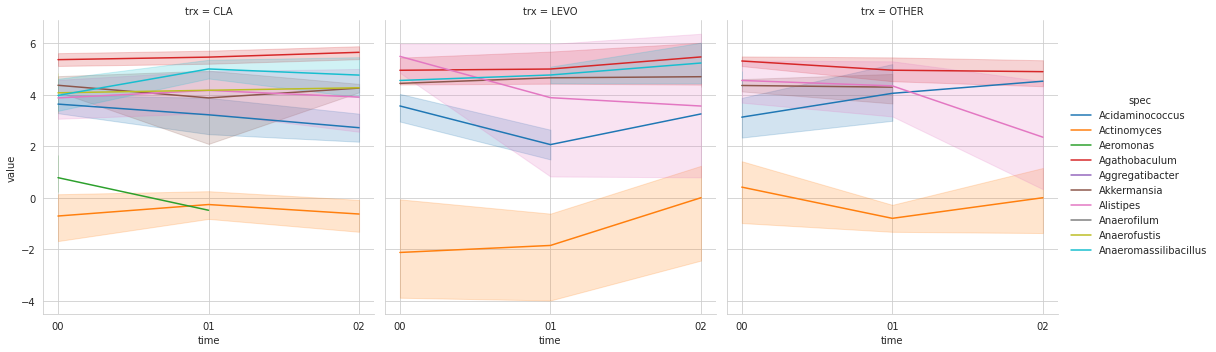

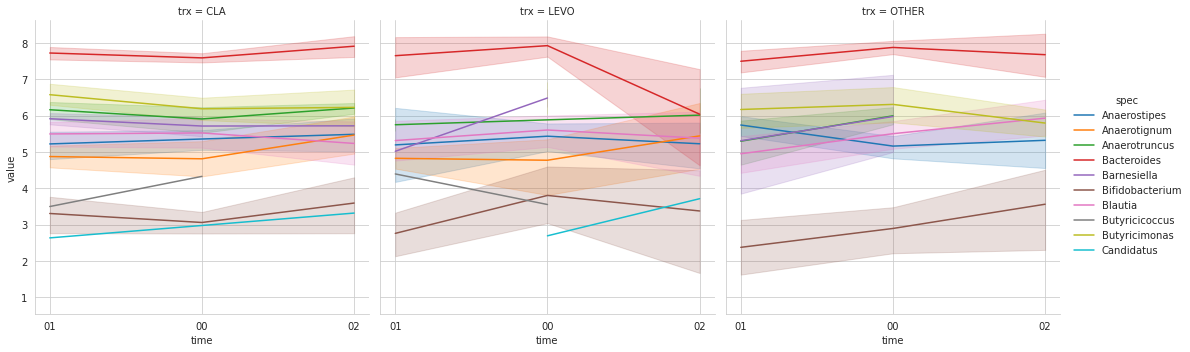

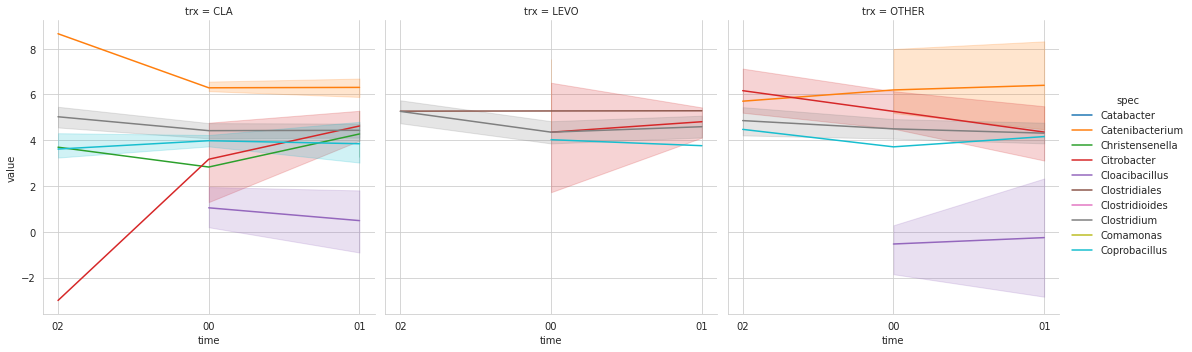

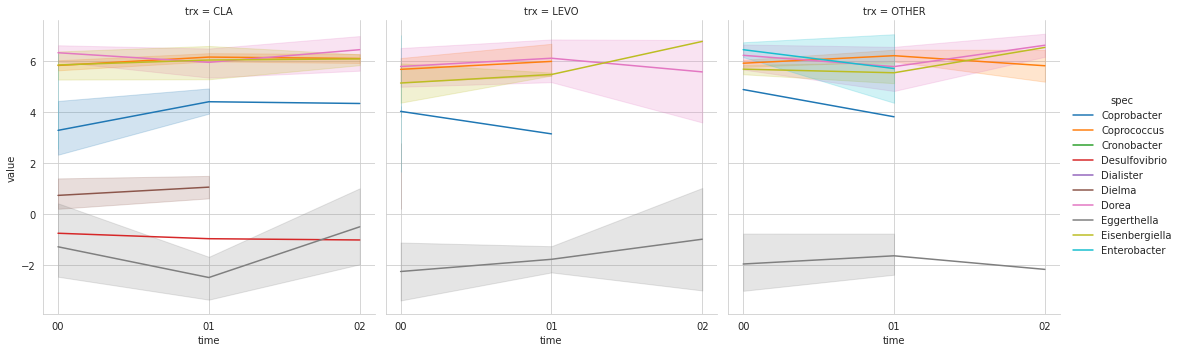

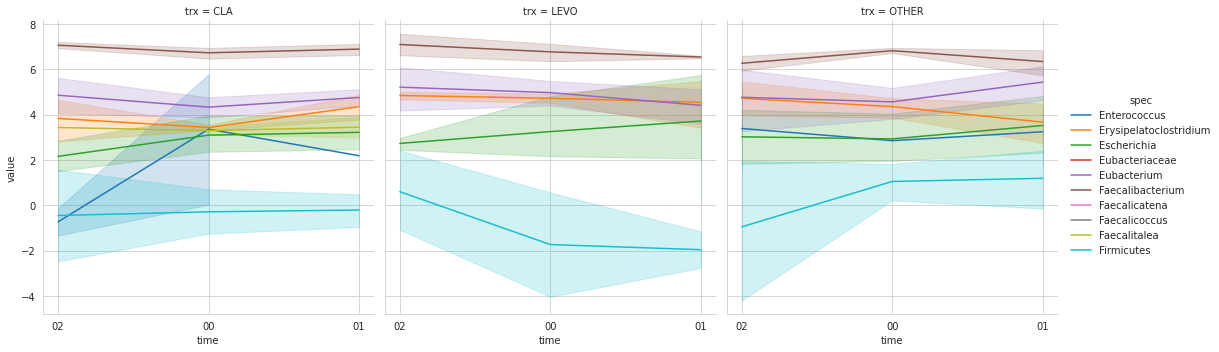

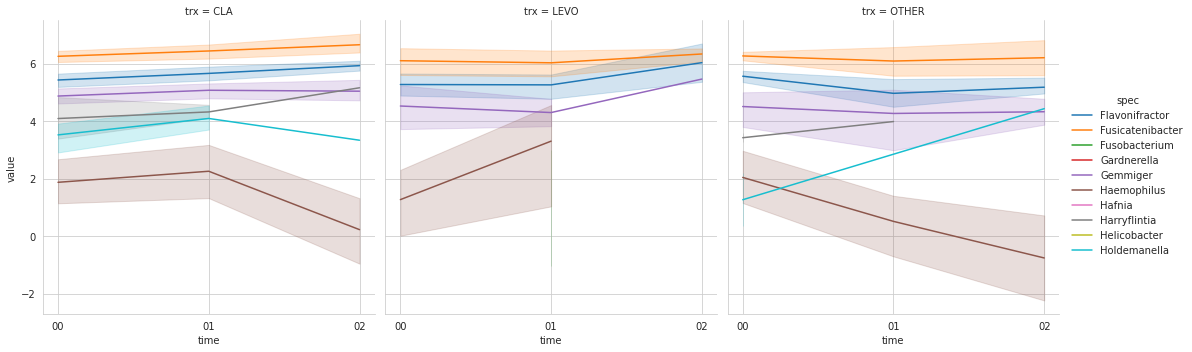

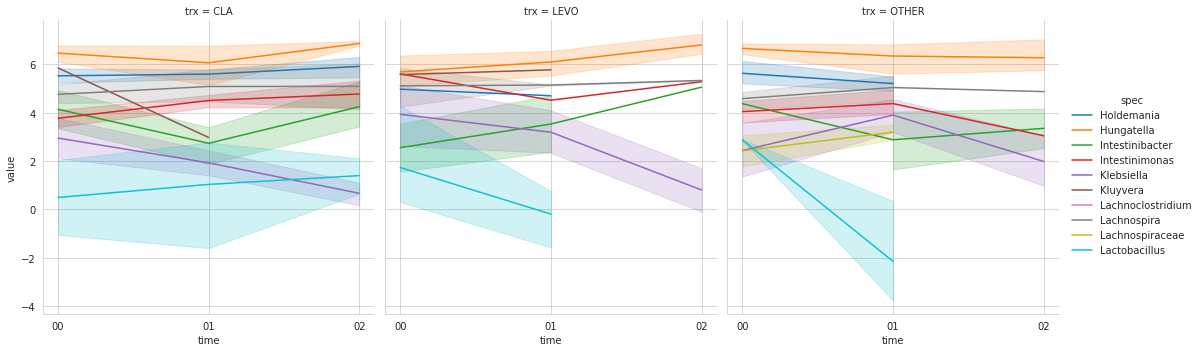

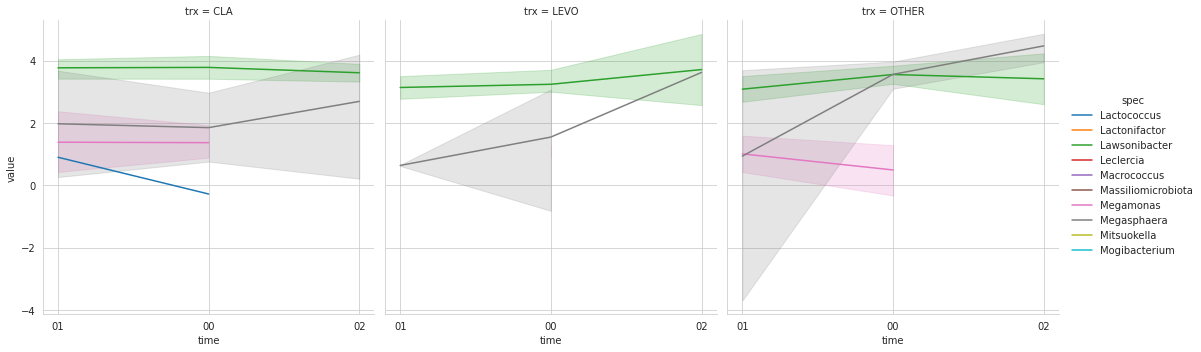

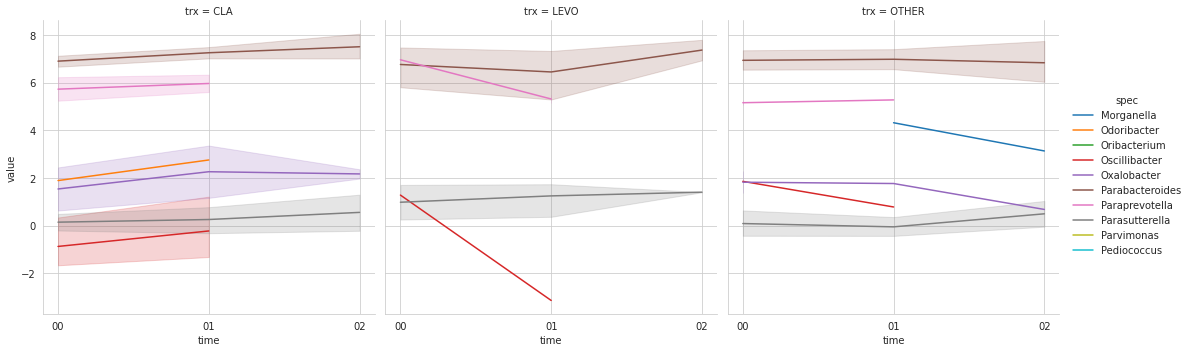

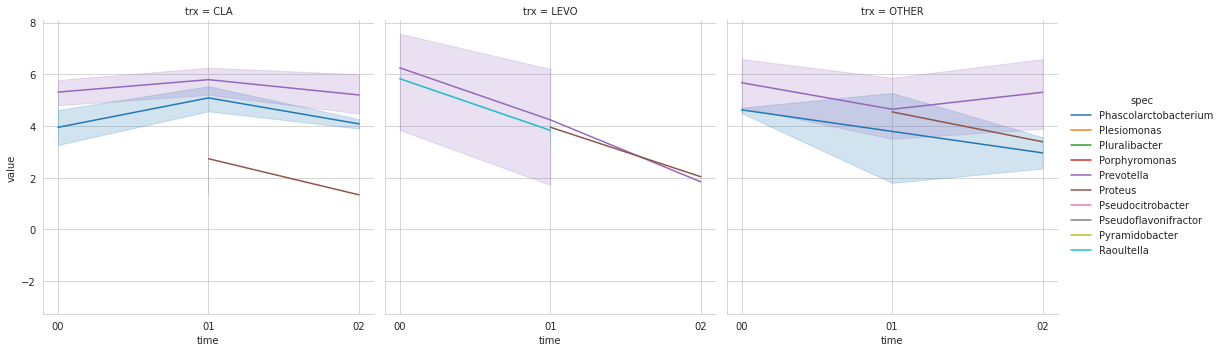

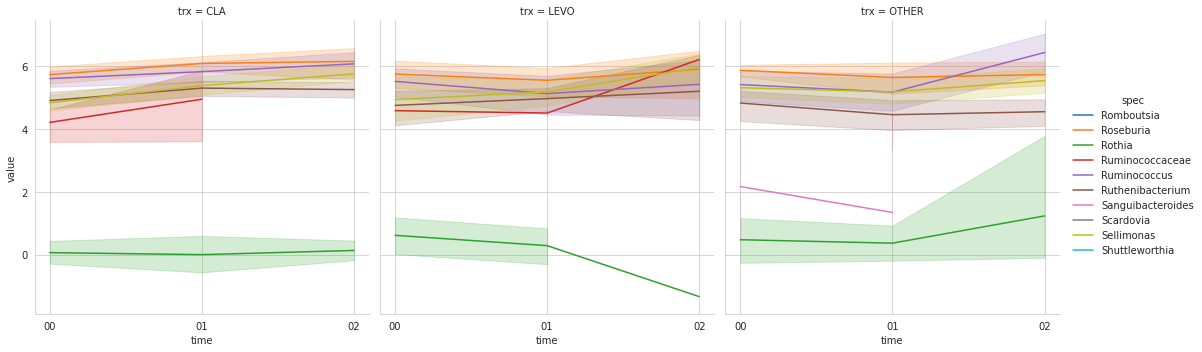

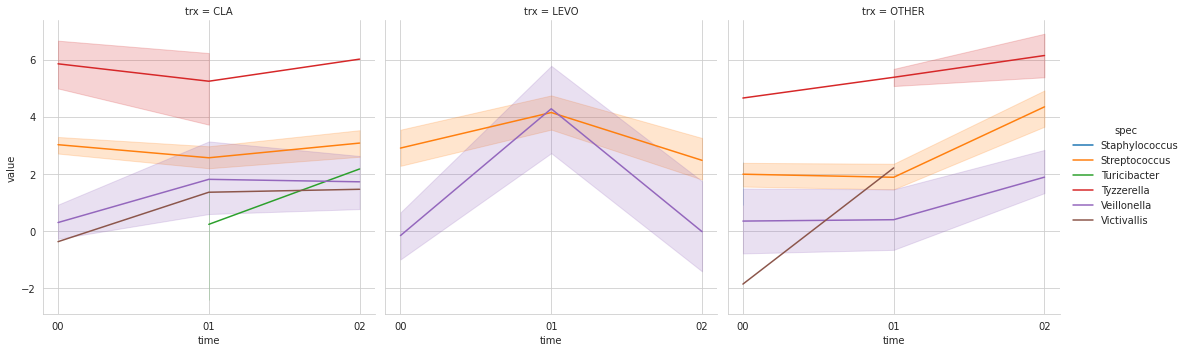

In [599]:
plt.figure(figsize=(10,8))
# sns.lineplot(data=FR_00Ab, x="time", y="value", hue="trx", style="spec")
# FR_00Ab=FR_00Ab[FR_00Ab['trx']=='CLA']
for i in range(1,117,10):
    sns.relplot(
        data=FR_00Ab[FR_00Ab['spec'].isin(np.unique(FR_00Ab['spec'])[i:i+10])], x="time", y=(FR_00Ab["value"]),
        col="trx", hue="spec",#, style="event",
        kind="line",col_order=['CLA','LEVO','OTHER']#,x_order=['00ST','01ST','02ST']
    )
    # plt.savefig("data/gcn/img/spec_trx_012"+str(i)+".png",dpi=300,bbox_inches = "tight")

In [138]:
spFR_00Ab.reset_index(inplace=True)
spFR_0=spFR_00Ab[spFR_00Ab['Unnamed: 0'].str.contains('00ST')]
spFR_1=spFR_00Ab[spFR_00Ab['Unnamed: 0'].str.contains('01ST')]
spFR_2=spFR_00Ab[spFR_00Ab['Unnamed: 0'].str.contains('02ST')]
spFR_01=spFR_0.merge(spFR_1,on=['spec','trx'])
spFR_02=spFR_0.merge(spFR_2,on=['spec','trx'])
spFR_12=spFR_1.merge(spFR_2,on=['spec','trx'])

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=spFR_01, x="value_x", y="value_y", hue="trx")
plt.xlim(-1,30000)
plt.ylim(-1,30000)
plt.xlabel('00ST - total spec Abs')
plt.ylabel('01ST - total spec Abs')

# Arg Ab nestedness

In [451]:
names=('CLA_00ST','CLA_01ST','CLA_02ST','LEVO_00ST','LEVO_01ST',
                    'LEVO_02ST','OTHER_00ST','OTHER_01ST','OTHER_02ST')
rr=pd.DataFrame(columns=['N','Q','I','name'])

for ii,i in enumerate(names):
    FR=pd.read_csv('SYNCSA_eval/0_rand_comm_'+i+'.csv')
    FR.rename(columns={'Unnamed: 0':'indv'},inplace=True)
    aa=FR.dropna().melt('indv')
    labels1,levels1=pd.factorize(aa['indv'])
    aa['indv']=labels1
    labels2,levels2=pd.factorize(aa['variable'])
    aa['variable']=labels2
    # aa['value']=1
    aa=aa[aa['value']>0]
    aa['value']=1
    aa=np.array(aa)
    # FR0.to_csv('nest/FR_test/'+i+'.txt',sep='\t',header=False,index=False)
    
    nodes_cols = int(max(aa[j,1] for j in range(aa.shape[0]))+1)
    nodes_rows= int(max(aa[j,0] for j in range(aa.shape[0]))+1)
    M=np.zeros((nodes_rows,nodes_cols),dtype='int')
    for j in range(aa.shape[0]):
        M[aa[j,0],aa[j,1]] = 1
        
    cols_degr=M.sum(axis=0)
    row_degr=M.sum(axis=1)
    R,C=M.shape #rows and cols
    #Nestednes
    # In-block nestedness with B=1
    Cn_=[np.repeat(1, R),np.repeat(1, C)]
    max_blockN=max(max(Cn_[0]),max(Cn_[1]))+1
    lambdasN=extremal_bi.call_lambda_i(M,cols_degr,row_degr,Cn_[1],Cn_[0],max_blockN,True)
    nestedness_=extremal_bi.calculate_Fitness(M,cols_degr,row_degr,lambdasN[0],lambdasN[1],True)

    #Modularity Extremal
    C_=extremal_bi.recursive_step(M,cols_degr,row_degr,.7,3,False)
    max_blockQ=max(max(C_[0]),max(C_[1]))+1
    lambdasQ=extremal_bi.call_lambda_i(M,cols_degr,row_degr,C_[1],C_[0],max_blockQ,False)
    Q_=extremal_bi.calculate_Fitness(M,cols_degr,row_degr,lambdasQ[0],lambdasQ[1],False)

    # Inblock nestedness extremal
    Ci_=extremal_bi.recursive_step(M,cols_degr,row_degr,.7,3,True)
    max_blockI=max(max(Ci_[0]),max(Ci_[1]))+1
    lambdasI=extremal_bi.call_lambda_i(M,cols_degr,row_degr,Ci_[1],Ci_[0],max_blockI,True)
    I_=extremal_bi.calculate_Fitness(M,cols_degr,row_degr,lambdasI[0],lambdasI[1],True)      
    [nestedness_,Q_,I_,ii]
    
    cc = pd.DataFrame({'N': nestedness_,
                           'Q': Q_,
                           'I': I_,
                           'name': i}, 
                           index = [0])
    rr=rr.append(cc)#,ignore_index=True)

In [455]:
rr

,N,Q,I,name
0,0.045069,0.131624,0.059921,CLA_00ST
0,0.031845,0.136235,0.051968,CLA_01ST
0,0.007964,0.190423,0.02115,CLA_02ST
0,0.014155,0.14944,0.014155,LEVO_00ST
0,0.008279,0.187963,0.0264,LEVO_01ST
0,0.005837,0.213019,0.026132,LEVO_02ST
0,0.016934,0.116209,0.016934,OTHER_00ST
0,0.022715,0.191261,0.067665,OTHER_01ST
0,0.004488,0.154206,0.027716,OTHER_02ST


In [461]:
# rr['spec']=rr['variable'].str.split('_').str[2]
# spFR_00Ab=FR_00Ab.groupby(['spec','Unnamed: 0']).sum()
# spFR_00Ab.reset_index(inplace=True)
rr['trx']=rr['name'].str.split('_').str[0]
rr['time']=rr['name'].str.split('_').str[1].str.split('ST').str[0]
del rr['name']
rr00=rr.melt(['time','trx'])

<Figure size 720x576 with 0 Axes>

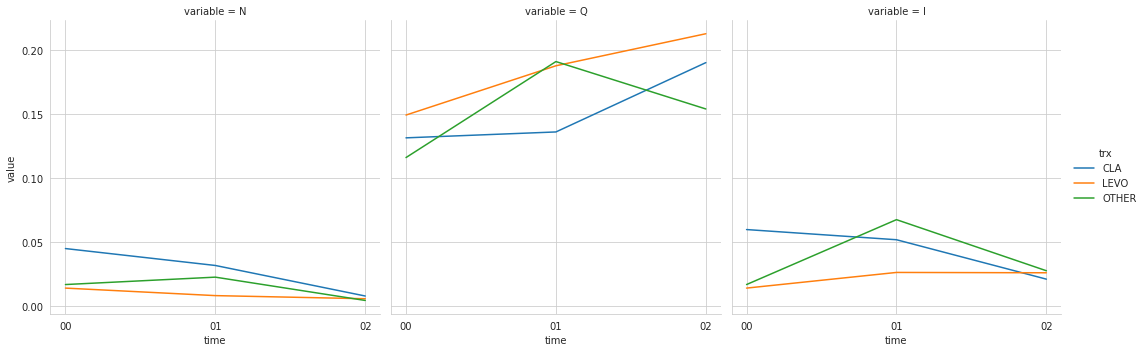

In [463]:
plt.figure(figsize=(10,8))
# sns.lineplot(data=FR_00Ab, x="time", y="value", hue="trx", style="spec")
# for i in range(1,117,10):
sns.relplot(
    data=rr00, x="time", y='value',
    col="variable", hue="trx",#, style="event",
    kind="line",hue_order=['CLA','LEVO','OTHER']#,x_order=['00ST','01ST','02ST']
)
    # plt.savefig("data/gcn/img/spec_trx_012"+str(i)+".png",dpi=300,bbox_inches = "tight")

In [ ]:
!python nestedness_analysis/structural_analysis.py nest/FR_test/ True True 0

In [8]:
sys.path.insert(1, './run/gcn/')
import gcn_func
importlib.reload(sys.modules['gcn_func'])
from gcn_func import research_orthologs

norm_Px=pd.read_csv('data/Pipeline_consolidate_220301/Norm_Px.txt',sep='\t')
PS=pd.DataFrame(columns=['mus','homo','spec'])
for i in norm_Px['Protein']:
    try:
        P,S=research_orthologs(str(i),'Homo sapiens')
    except:
        print(i)
    cc = pd.DataFrame({'mus': i,
                           'homo': P,
                           'spec': S}, 
                           index = [0])
    PS=PS.append(cc)
    cc.to_csv('mus_homo_int2.txt',sep='\t',mode='a')
PS.to_csv('mus_homo2.txt',sep='\t')

P01872
P08074
P0DP28
P10649
P23953
P28665
Q61838
Q8CGP2
A0A1Y7VKY1
A8DUK4
A9R9W0
D3Z2H9
O08692
O35744


In [6]:
PS

,mus,homo,spec
0,E9PV24,P02671,Homo sapiens
0,O08553,Q16555,Homo sapiens
0,O08638,P35749,Homo sapiens
0,O08677,P01042,Homo sapiens
0,O08709,P30041,Homo sapiens
0,O08749,P09622,Homo sapiens
0,O09164,P08294,Homo sapiens
0,O35074,Q16647,Homo sapiens
0,O35206,P39059,Homo sapiens
0,O35639,P12429,Homo sapiens
